In [1]:
# Importing necessary libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Exploratory Data Analysis

### Overview of the Dataset

In [2]:
# Read data from the cleaned .csv file with new variables added, which is an updated version of the original .csv file.
df = pd.read_csv('cleaned_retractions35215_V10.csv')
df.iloc[:,:12].head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,RetractionDate,OriginalPaperDate,Reason
0,50792,A fractional order nonlinear model of the love...,(B/T) Data Science;(PHY) Mathematics;,"Department of Mathematical Sciences, College o...",Scientific Reports,Springer - Nature Publishing Group,United Arab Emirates,Zulqurnain Sabir;Salem Ben Said,Research Article;,8/1/2024,3/4/2023,Duplication of Article;Euphemisms for Duplicat...
1,50782,Investigation of automotive digital mirrors er...,(PHY) Engineering - Mechanical;,"Department of Physics, Faculty of Science, Cai...",Journal of Optics (India),Springer,Egypt,H S Ayoub;Wessam M Hussein;Y H Elbashar,Research Article;,6/1/2024,12/1/2021,Fake Peer Review;Investigation by Journal/Publ...
2,50781,Optical spectroscopic analysis of bandpass fil...,(PHY) Chemistry;(PHY) Crystallography/Spectros...,"Egypt Nanotechnology Center ((EGNC)), Cairo Un...",Journal of Optics (India),Springer,Egypt,Y H Elbashar;M A Mohamed;D Rayan;A M Badr;H A ...,Research Article;,9/1/2024,5/5/2020,Concerns/Issues with Peer Review;Fake Peer Rev...
3,50731,THz Design Variable Estimation by Deep Optimiz...,(B/T) Computer Science;(B/T) Technology;,"School of Computing Science and Engineering, V...","Terahertz Devices, Circuits and Systems",Springer,India,L Sathish Kumar;B Sathish Kumar;A Padmapriya;S...,Book Chapter/Reference Work;,27/09/2022,27/09/2022,Date of Retraction/Other Unknown;Euphemisms fo...
4,50727,A Study on Glycyrrhiza glabra-Fortified Bread:...,(BLS) Biochemistry;(ENV) Food Science;(HSC) Nu...,"Department of Mechanical Engineering, Aarupada...",Bioinorganic Chemistry and Applications,Hindawi,Ethiopia;India;Turkey,M Prabhahar;Gomathi Kannayiram;Prakash Sekar;S...,Research Article;,16/08/2023,30/08/2022,Concerns/Issues About Data;Concerns/Issues Abo...


In [3]:
df.iloc[:,12:].head()

,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,Reason_group,CountryCount,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness
0,5,Q1,0.900000,315.000000,280,2,3,7,Academic misconduct and no scientific error;Sc...,1,0,304,0,The most serious
1,2,Q3,0.290000,23.000000,1089,3,2,5,Scientific error and academic misconduct;Scien...,1,0,1115,0,The most serious
2,14,Q3,0.290000,23.000000,1344,5,5,6,Scientific error and academic misconduct;Scien...,1,0,1367,0,The most serious
3,0,Q5,1.458473,157.555562,0,4,3,5,Academic misconduct and no scientific error;No...,1,0,492,0,Serious
4,2,Q1,0.764000,48.000000,351,8,4,10,Scientific error and no academic misconduct;No...,3,1,520,0,Less serious


In [4]:
df.shape

(35215, 26)

The dataset has 35215 rows and 23 columns.

In [5]:
# Check if there's any missing values or abnormal data and check datatypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35215 entries, 0 to 35214
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record ID                     35215 non-null  int64  
 1   Title                         35215 non-null  object 
 2   Subject                       35215 non-null  object 
 3   Institution                   35215 non-null  object 
 4   Journal                       35215 non-null  object 
 5   Publisher                     35215 non-null  object 
 6   Country                       35215 non-null  object 
 7   Author                        35215 non-null  object 
 8   ArticleType                   35215 non-null  object 
 9   RetractionDate                35215 non-null  object 
 10  OriginalPaperDate             35215 non-null  object 
 11  Reason                        35215 non-null  object 
 12  CitationCount                 35215 non-null  int64  
 13  S

- There is no missing data or null value.
- Some features have incorrect datatype.

In [6]:
# Convert 'RetractionDate' and 'OriginalPaperDate' to datetime type
df['RetractionDate'] = pd.to_datetime(df['RetractionDate'], format='%d/%m/%Y')
df['OriginalPaperDate'] = pd.to_datetime(df['OriginalPaperDate'], format='%d/%m/%Y')

# Convert 'IsInternationalCollaboration' from int64 to bool
df['IsInternationalCollaboration'] = df['IsInternationalCollaboration'].astype(bool)

# Convert 'Record ID' to string
df['Record ID'] = df['Record ID'].astype(str)

# Convert 'IsPaywalled' to boolean
df['IsPaywalled'] = df['IsPaywalled'].astype(bool)

# Display the updated data types to verify the changes
df.dtypes

Record ID                               object
Title                                   object
Subject                                 object
Institution                             object
Journal                                 object
Publisher                               object
Country                                 object
Author                                  object
ArticleType                             object
RetractionDate                  datetime64[ns]
OriginalPaperDate               datetime64[ns]
Reason                                  object
CitationCount                            int64
SJR Best Quartile                       object
SJR                                    float64
H index                                float64
TimeToRetraction                         int64
AuthorCount                              int64
SubjectCount                             int64
ReasonCount                              int64
Reason_group                            object
CountryCount 

### Descriptive Analysis

#### Identify outliers

In [7]:
# Function to find outliers in each column
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return column[(column < lower_bound) | (column > upper_bound)]

# Function to print out the number of outliers
def print_outlier_counts(dataframe):
    # Consider all columns
    columns_to_check = dataframe.columns
    
    for column in columns_to_check:
        if dataframe[column].dtype in ['float64', 'int64']:  # Checks if the column is numeric
            outliers = find_outliers(dataframe[column])
            print(f"The column '{column}' has {len(outliers)} outliers.")

In [8]:
print_outlier_counts(df)

The column 'CitationCount' has 4079 outliers.
The column 'SJR' has 1727 outliers.
The column 'H index' has 4155 outliers.
The column 'TimeToRetraction' has 3164 outliers.
The column 'AuthorCount' has 1860 outliers.
The column 'SubjectCount' has 2053 outliers.
The column 'ReasonCount' has 1937 outliers.
The column 'CountryCount' has 4516 outliers.
The column 'ArticleAge' has 444 outliers.


However, we decided to keep outliers because they might provide valuable insights into variability.

#### Descriptive statistics

- Measures of Central Tendency: Mean, median
- Measures of Dispersion: Max, min, range, variance, standard deviation
- The Interquartile Range: pct25, pct75, IQR

In [9]:
# Assign df to sample
continuous_features = df[['CitationCount', 'TimeToRetraction', 'AuthorCount', 'SubjectCount', 'ReasonCount', 'CountryCount', 'ArticleAge']]

In [10]:
# Function to list stastistics summary for continuous data
def statistics_summary(sample):
    summary_stats = sample.describe()
    summary_stats.loc['median'] = sample.median()
    summary_stats.loc['variance'] = sample.var()
    summary_stats.loc['range'] = sample.max() - sample.min()
    summary_stats.loc['IQR'] = sample.quantile(0.75) - sample.quantile(0.25)
    return summary_stats

In [11]:
# Statistics summary of the sample
sum_stats = pd.DataFrame(statistics_summary(continuous_features))

# Get rounding numbers
sum_stats_rounded = sum_stats.round(0).astype(int)
sum_stats_rounded.iloc[:,:]

,CitationCount,TimeToRetraction,AuthorCount,SubjectCount,ReasonCount,CountryCount,ArticleAge
count,35215,35215,35215,35215,35215,35215,35215
mean,16,840,4,4,4,1,3295
std,56,1257,3,1,2,1,2259
min,0,0,1,2,2,1,123
25%,0,79,2,3,3,1,1303
50%,2,393,3,3,4,1,3113
75%,13,1007,5,4,5,1,4668
max,3406,19511,88,11,13,28,30377
median,2,393,3,3,4,1,3113
variance,3141,1580191,10,1,4,0,5101880


In [12]:
# Describe categorical features
categorical_features = df[['Record ID', 'Title', 'Subject', 'Institution', 'Journal', 'Publisher', 'Author', 'ArticleType', 'Reason','Reason_group']]
categorical_stats = pd.DataFrame(df.describe(include=['O']))
categorical_stats

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,Reason,SJR Best Quartile,Reason_group,LevelOfSeriousness
count,35215,35215,35215,35215,35215,35215,35215,35215,35215,35215,35215,35215,35215
unique,35215,35187,9260,33133,5530,575,1620,33486,68,6456,6,15,4
top,50792,Introduction,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,Unknown,2011 International Conference on E-Business an...,IEEE: Institute of Electrical and Electronics ...,China,Hironobu Ueshima;Hiroshi Otake,Research Article;,Breach of Policy by Author;Date of Retraction/...,Q5,No scientific error and no academic misconduct,The least serious
freq,1,3,1248,172,1239,7727,18976,71,22064,3320,18990,11560,11560


##### Some imporant points from the statistics summary:
- CitationCount and TimeToRetraction Range: Indicates significant variability, suggesting outliers or special cases that might need further investigation.
- 
High Standard Deviation in TimeToRetraction and ArticleAge: Points to a wide spread in the data, highlighting the diversity in article lifespans and retraction time
- Skewed Distributions for CitationCount and TimeToRetraction: The disparity between mean and median values suggests the influence of outliers, affecting the overall data analysis.
- Large IQR for Key Variables: Reflects considerable dispersion within the dataset, emphasizing the need for median and quartile-based analyses over mean-based measures.sures.

#### Histograms

In [13]:
def plot_hist(sample):
    # Determine the number of rows and columns for your subplot grid
    n_rows = 2
    n_cols = 4

    sample_numerical = sample.iloc[:, :]

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))

    # Plot histograms in all subplots using for loop
    for i, col in enumerate(sample_numerical.columns):
        row = i // n_cols
        col = i % n_cols
        axs[row, col].hist(sample_numerical[sample_numerical.columns[i]], bins=50, alpha=0.7, edgecolor='black')
        axs[row, col].set_title(sample_numerical.columns[i])

    # Delete subplots that are not needed
    if len(sample_numerical.columns) < n_rows*n_cols:
        for i in range(1, n_rows*n_cols - len(sample_numerical.columns) + 1):  # Iterate over the last subplots that are not needed
            fig.delaxes(axs.flat[-i])  # Delete the subplot

    plt.tight_layout()
    plt.show()

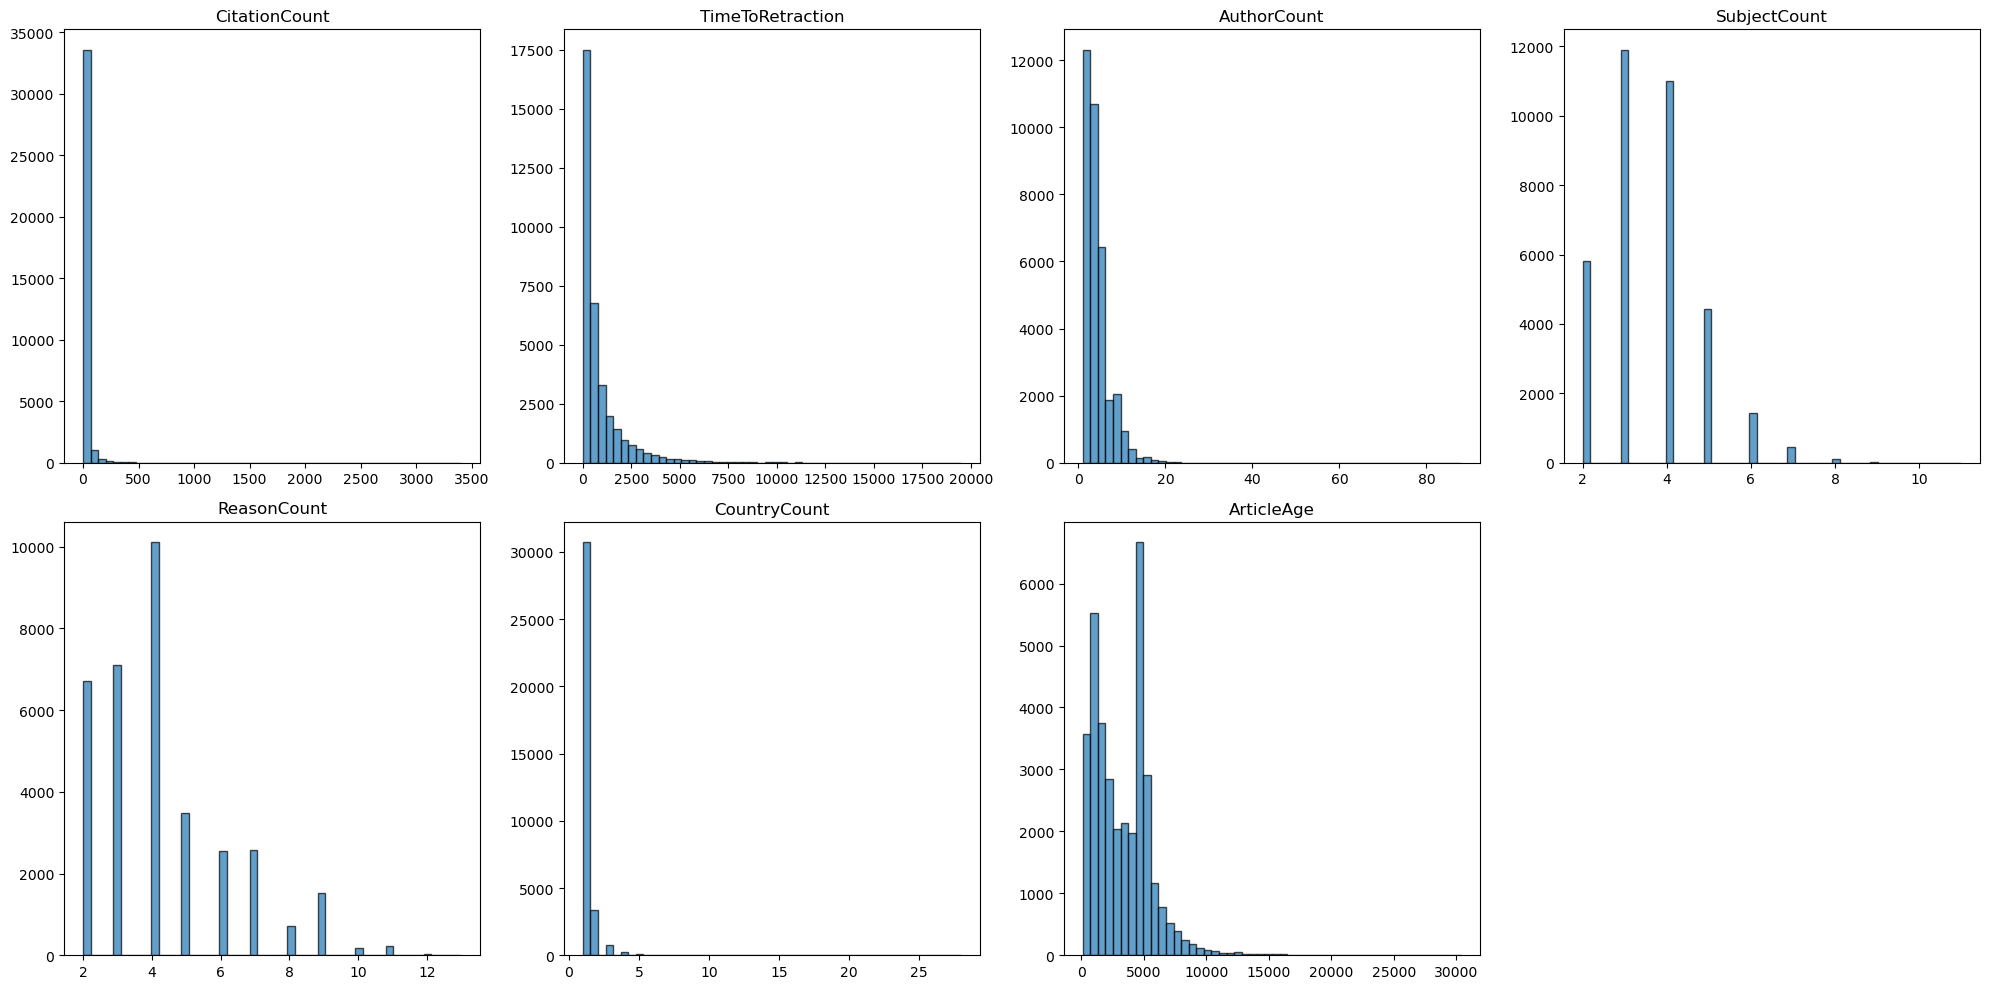

In [14]:
# Plot histograms for sample
plot_hist(continuous_features)

Most data aren't shaped like a normal distribution. But we shouldn't just depend on histograms to figure this out; it's important to run a normality test as well.

In [15]:
# Function to test normality
def normality_test(sample):
    # D'Agostino's K^2 test:
    for column in sample.columns:
        data = sample[column]
        k2, p = stats.normaltest(data)

        print('Column:', column)
        print('k2 =', k2)
        print('p =', p)

        # If p < 0.05, conclude that the data does not follow a normal distribution
        if p < 0.05:
            print('Data is not normally distributed.\n')
        else:
            print('Data is normally distributed.\n')

In [16]:
# Check if data of sample is normally distributed
normality_test(continuous_features)

Column: CitationCount
k2 = 79006.32351850256
p = 0.0
Data is not normally distributed.

Column: TimeToRetraction
k2 = 25988.77632798195
p = 0.0
Data is not normally distributed.

Column: AuthorCount
k2 = 30045.73089868899
p = 0.0
Data is not normally distributed.

Column: SubjectCount
k2 = 3192.9390595663826
p = 0.0
Data is not normally distributed.

Column: ReasonCount
k2 = 5080.798608753701
p = 0.0
Data is not normally distributed.

Column: CountryCount
k2 = 48163.41627850495
p = 0.0
Data is not normally distributed.

Column: ArticleAge
k2 = 9274.229536025843
p = 0.0
Data is not normally distributed.



### Statistical Analysis

#### Inferential statistics

Given the substantial size of our data 35215, which is large enough (>30), a z-test should be performed to calculate the confidence interval.

In [17]:
# Function to calculate confidence interval of data from each column in a sample
def confidence_interval_z(samp):
    # Iterate over each column in the DataFrame
    for i in range(0, len(samp.columns)):
        # Select the current column
        sample = samp.iloc[:, i]
        column_name = samp.columns[i]  # Get column name

        # Sample mean, standard deviation, and sample size
        x_bar = sample.mean()
        s = sample.std()
        n = sample.shape[0]

        # Standard error
        std_err = s / math.sqrt(n)

        # Confidence level and significance level
        conf_lvl = 0.95  # we choose confidence level = 0.95
        sig_lvl = 1 - conf_lvl
        z_critical = stats.norm.ppf(1 - sig_lvl/2)  # z-critical value

        # Confidence interval with z-distribution
        ci_low_z = x_bar - z_critical * std_err
        ci_upp_z = x_bar + z_critical * std_err
        print(f"C.I. for column {column_name} (z*): {ci_low_z:.5f} to {ci_upp_z:.5f}. Interval size: {ci_upp_z - ci_low_z:.5f}.")

Confidence interval for the average value from data

In [18]:
confidence_interval_z(continuous_features)

C.I. for column CitationCount (z*): 14.97105 to 16.14183. Interval size: 1.17078.
C.I. for column TimeToRetraction (z*): 826.80774 to 853.06618. Interval size: 26.25844.
C.I. for column AuthorCount (z*): 4.09513 to 4.15954. Interval size: 0.06441.
C.I. for column SubjectCount (z*): 3.58426 to 3.60824. Interval size: 0.02398.
C.I. for column ReasonCount (z*): 4.23780 to 4.27897. Interval size: 0.04117.
C.I. for column CountryCount (z*): 1.17634 to 1.18879. Interval size: 0.01245.
C.I. for column ArticleAge (z*): 3271.87242 to 3319.05475. Interval size: 47.18233.


### Univariate analysis

In [19]:
# Function to find top n of value count in one column and visualise them
# columns_of_interest = ['Subject', 'Country', 'Author', 'ArticleType', 'Reason', 'Reason_group', 'Reason_group2']
def plot_top_n_value_counts(df, columns, n, title, x_label, bar_color='blue'):
    for column in columns:
        all_values = df[column].str.split(';').explode()

        # Drop values that are empty or null
        all_values = all_values[all_values != ''].dropna()
        
        # Split values for each column, count occurrences, and select the top n
        values_count = all_values.value_counts().head(n)
        
        # Print value counts
        print(f"Top {n} Counts for {column}:")
        print(values_count)
        print("\n")
        
        # Plotting
        plt.figure(figsize=(10, 8))
        ax = values_count.plot(kind='bar', color=bar_color, alpha=0.6)  # Apply specified color to the bars
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel(x_label)
        plt.ylabel('Number of Retractions')  # Set y-axis label to 'Retractions'
        
        plt.xticks(rotation=45, ha="right")
        
        # Adding the count above each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.tight_layout()
        plt.show()

In [20]:
# Function to plot pie charts
def plot_pie_chart(df, columns, n, title, cmap_name='tab20'):
    for column in columns:
        all_values = df[column].str.split(';').explode()

        # Drop values that are empty or null
        all_values = all_values[all_values != ''].dropna()
        
        # Count occurrences of each value
        values_count = all_values.value_counts()
        
        # If there are more than n categories, sum the smallest ones into 'Others'
        if len(values_count) > n:
            others_sum = values_count.iloc[n:].sum()
            values_count = values_count.iloc[:n]
            values_count['Others'] = others_sum

        # Get the colormap
        cmap = plt.get_cmap(cmap_name)
        colors = cmap(range(len(values_count)))
        
        # Plotting as a pie chart
        plt.figure(figsize=(10, 8))
        values_count.plot.pie(autopct='%1.1f%%', startangle=140, labels=values_count.index, colors=colors)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel('')  # Hide the y-label
        
        plt.tight_layout()
        plt.show()

#### Value counts of feature 'Subject'

Top 20 Counts for Subject:
(BLS) Biology - Cellular           7655
(BLS) Genetics                     5081
(B/T) Technology                   4969
(BLS) Biochemistry                 4454
(B/T) Computer Science             4251
(BLS) Biology - Cancer             4168
(BLS) Biology - Molecular          3027
(SOC) Education                    2531
(HSC) Medicine - Oncology          2045
(B/T) Business - Economics         1993
(B/T) Business - Management        1616
(B/T) Data Science                 1601
(PHY) Chemistry                    1600
(PHY) Materials Science            1497
(BLS) Toxicology                   1460
(ENV) Environmental Sciences       1445
(PHY) Mathematics                  1421
(HSC) Medicine - Pharmacology      1350
(HSC) Medicine - Surgery           1291
(HSC) Medicine - Cardiovascular    1164
Name: Subject, dtype: int64




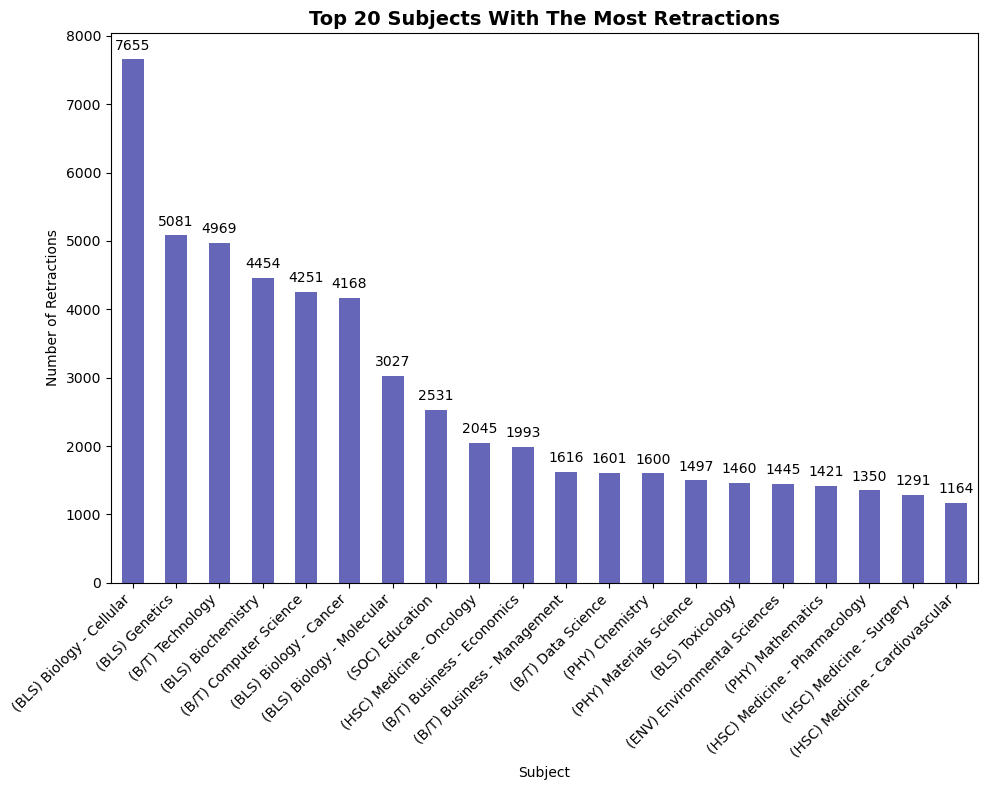

In [21]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Subject']], 20, "Top 20 Subjects With The Most Retractions", "Subject", 'darkblue')

#### Value counts of feature 'Country'

Top 20 Counts for Country:
China             20544
United States      4140
India              2679
Japan              1211
Iran               1058
United Kingdom      898
Germany             835
South Korea         737
Saudi Arabia        625
Italy               621
Pakistan            493
Canada              467
Egypt               461
France              447
Australia           415
Malaysia            377
Taiwan              369
Spain               344
Turkey              318
Netherlands         260
Name: Country, dtype: int64




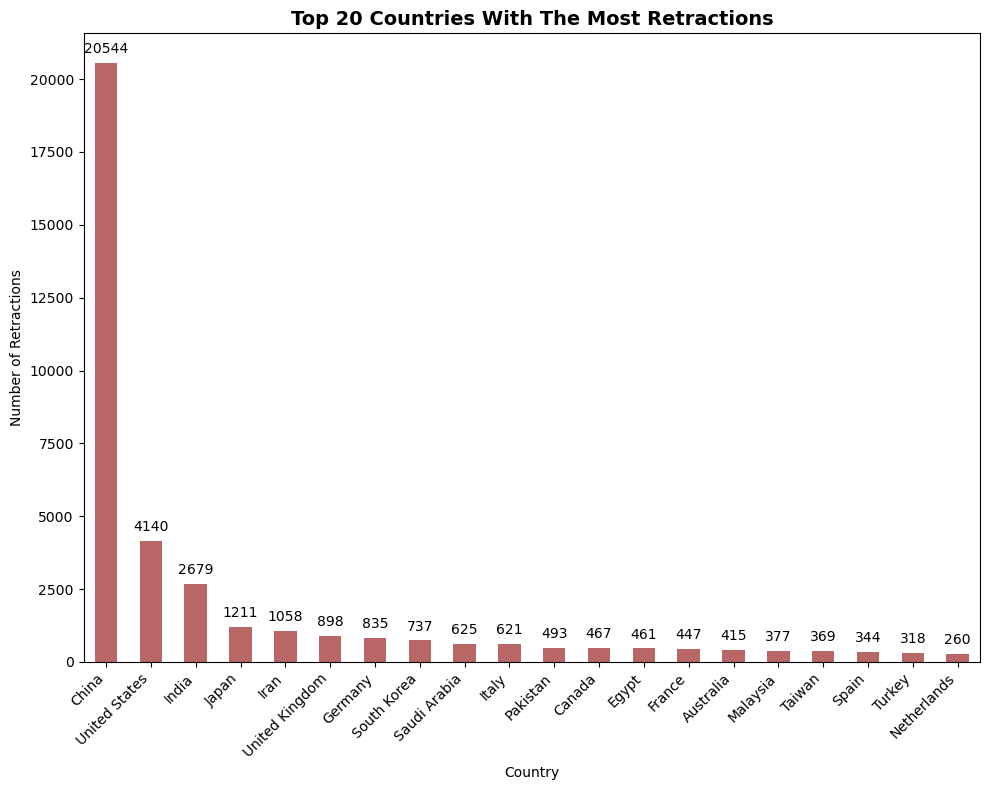

In [22]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Country']],20, "Top 20 Countries With The Most Retractions", "Country", 'darkred')

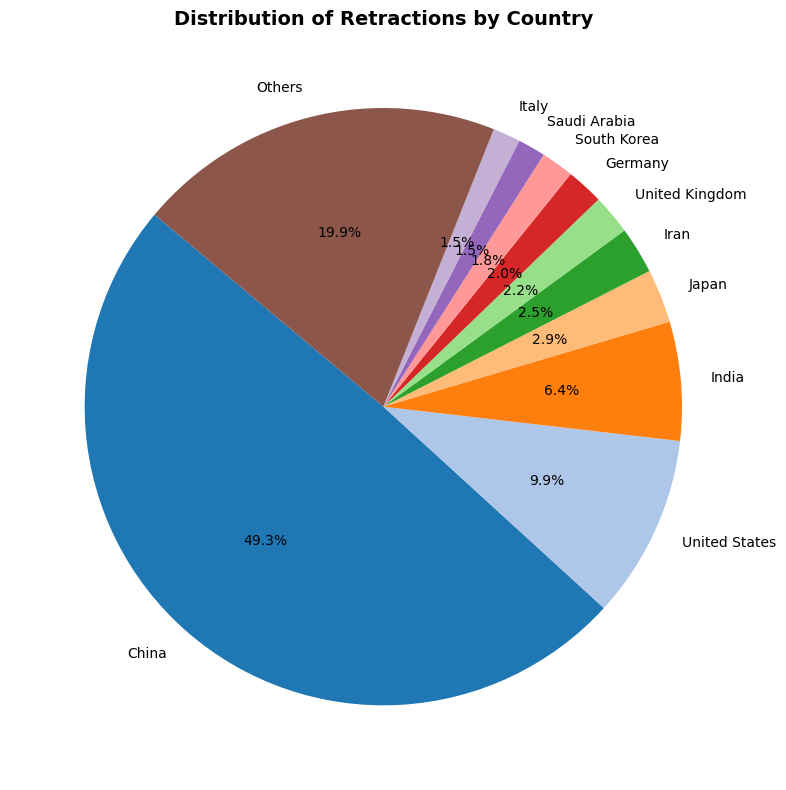

In [23]:
plot_pie_chart(df, df[['Country']], 10, 'Distribution of Retractions by Country')

#### Value counts of feature 'Author'

Top 20 Counts for Author:
Joachim Boldt          170
Yoshitaka Fujii        152
Hironobu Ueshima       119
Yoshihiro Sato         104
Wei Zhang              103
Hiroshi Otake          101
Wei Wang                98
Ali Nazari              97
Hidenori Toyooka        88
Hiroyoshi Tanaka        84
Lei Wang                83
Jun Iwamoto             82
Jing Wang               81
Wei Li                  73
Gunter G Hempelmann     69
Hui Wang                61
Jun Li                  59
Jing Li                 58
Wei Liu                 58
Yan Li                  57
Name: Author, dtype: int64




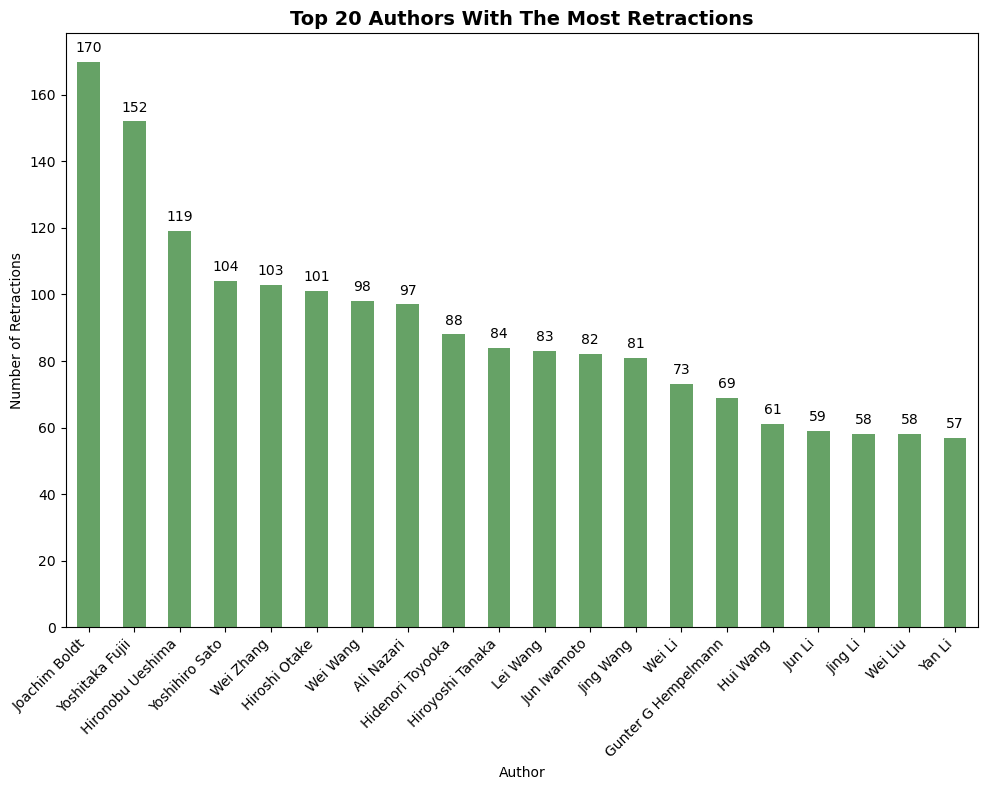

In [24]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Author']], 20, "Top 20 Authors With The Most Retractions", "Author", 'darkgreen')

#### Value counts of feature 'Institution'

Top 20 Counts for Institution:
Unknown                                                                                                                                                                 184
Department of Anesthesiology, Showa University Hospital, Tokyo, Japan                                                                                                    98
Department of Materials Science and Engineering, Saveh Branch, Islamic Azad University, Saveh, Iran                                                                      43
 Department of Botany and Microbiology, College of Science, King Saud University, Riyadh, Saudi Arabia                                                                   34
Plasma Physics Research Center, Science and Research Branch, Islamic Azad University, Tehran, Iran                                                                       33
College of Chemistry and Chemical Engineering, Provincial Key Laboratory of Coordination Chemistry, Jinggangs

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_35312\2887416471.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


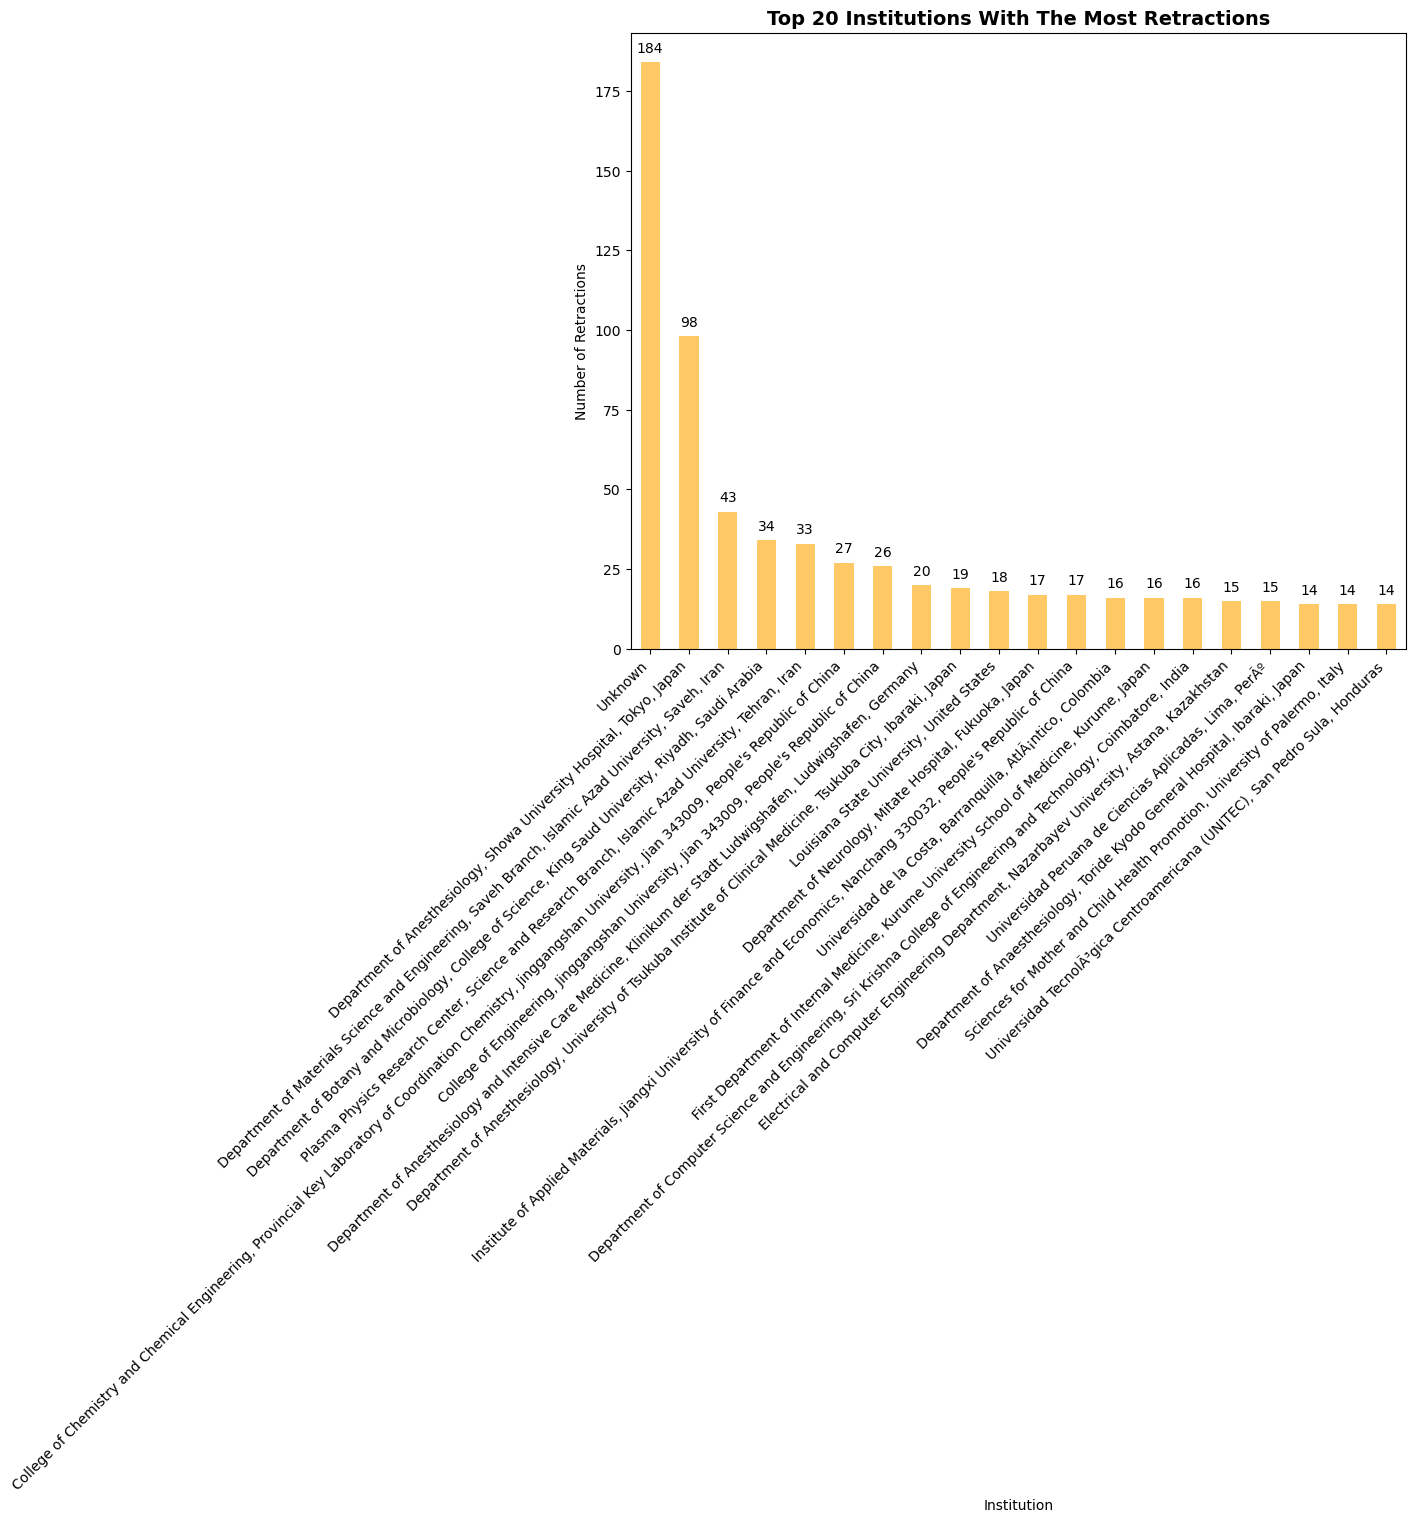

In [25]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Institution']], 20, "Top 20 Institutions With The Most Retractions", "Institution", 'orange')

#### Value counts of feature 'Journal'

Top 20 Counts for Journal:
2011 International Conference on E-Business and E-Government (ICEE)                                 1239
2011 5th International Conference on Bioinformatics and Biomedical Engineering                      1082
Journal of Physics: Conference Series                                                                870
PLoS One                                                                                             685
Computational Intelligence and Neuroscience                                                          525
Computational and Mathematical Methods in Medicine                                                   448
Journal of Ambient Intelligence and Humanized Computing                                              430
Journal of Healthcare Engineering                                                                    426
Evidence-Based Complementary and Alternative Medicine (Ecam)                                         414
Wireless Communications and 

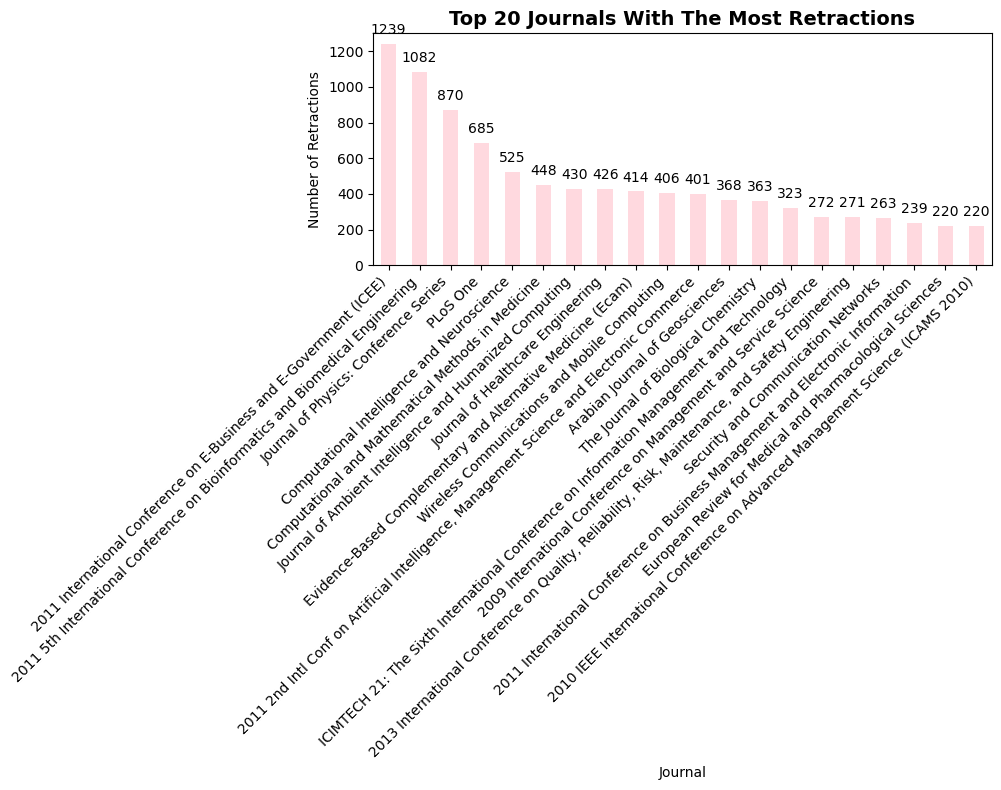

In [26]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Journal']], 20, "Top 20 Journals With The Most Retractions", "Journal", 'pink')

#### Value counts of feature 'Publisher'

Top 20 Counts for Publisher:
IEEE: Institute of Electrical and Electronics Engineers            7727
Hindawi                                                            4115
Elsevier                                                           4019
Springer                                                           3503
Wiley                                                              2080
IOP Publishing                                                     1080
Taylor and Francis                                                 1069
Springer - Nature Publishing Group                                 1008
SAGE Publications                                                   880
PLoS                                                                726
Taylor and Francis - Dove Press                                     487
Springer - Biomed Central (BMC)                                     451
Spandidos                                                           445
Association for Computing Machinery

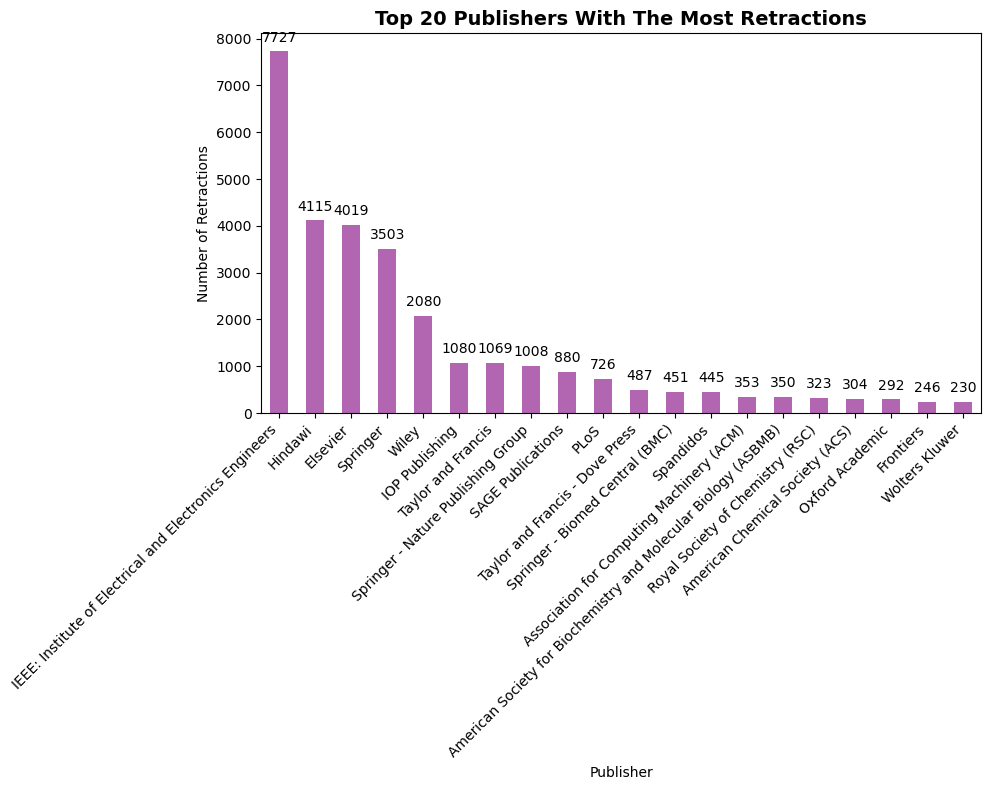

In [27]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Publisher']], 20, "Top 20 Publishers With The Most Retractions", "Publisher", 'purple')

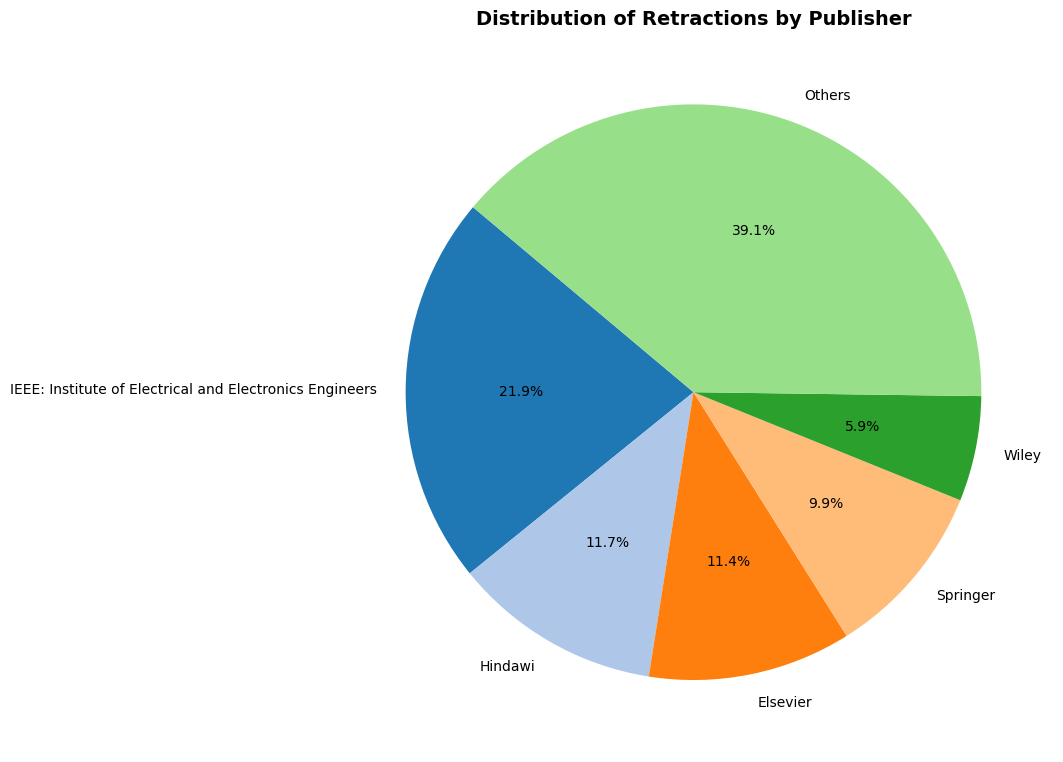

In [28]:
plot_pie_chart(df, df[['Publisher']], 5, 'Distribution of Retractions by Publisher')

#### Value counts of feature 'ArticleType'

Top 10 Counts for ArticleType:
Research Article             22595
Conference Abstract/Paper     9075
Clinical Study                1697
Review Article                1013
Case Report                    430
Meta-Analysis                  331
Article in Press               263
Letter                         241
Commentary/Editorial           126
Revision                       120
Name: ArticleType, dtype: int64




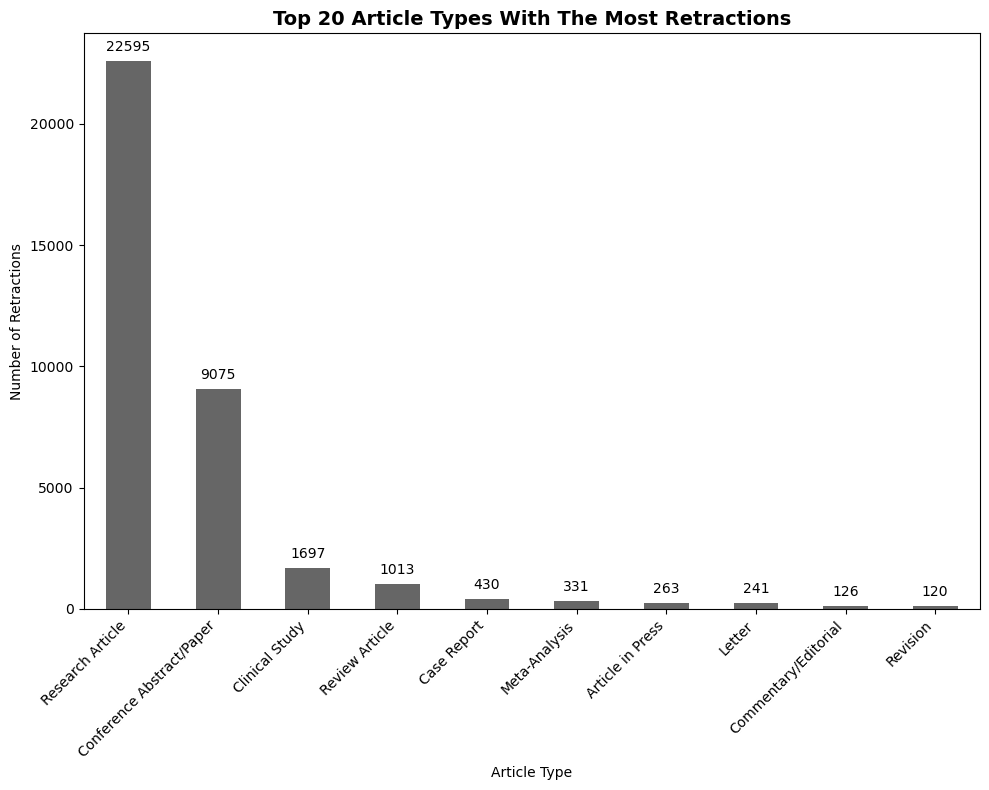

In [29]:
# Call the function to plot only the top 10 counts
plot_top_n_value_counts(df, df[['ArticleType']], 10, "Top 20 Article Types With The Most Retractions", "Article Type", 'black')

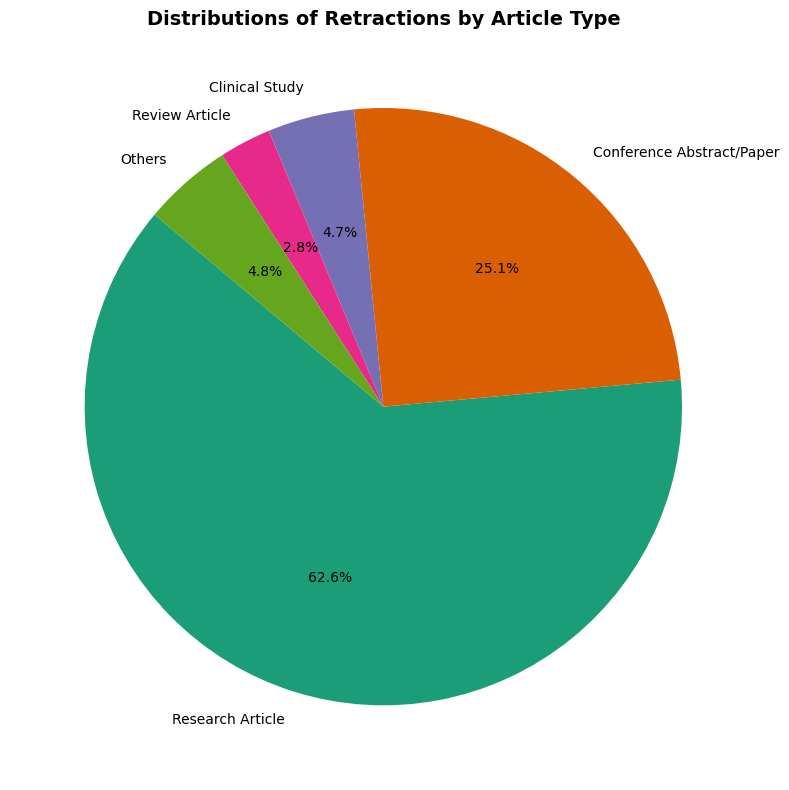

In [30]:
plot_pie_chart(df, df[['ArticleType']], 4, 'Distributions of Retractions by Article Type', 'Dark2')

#### Value counts of feature 'IsPaywalled'

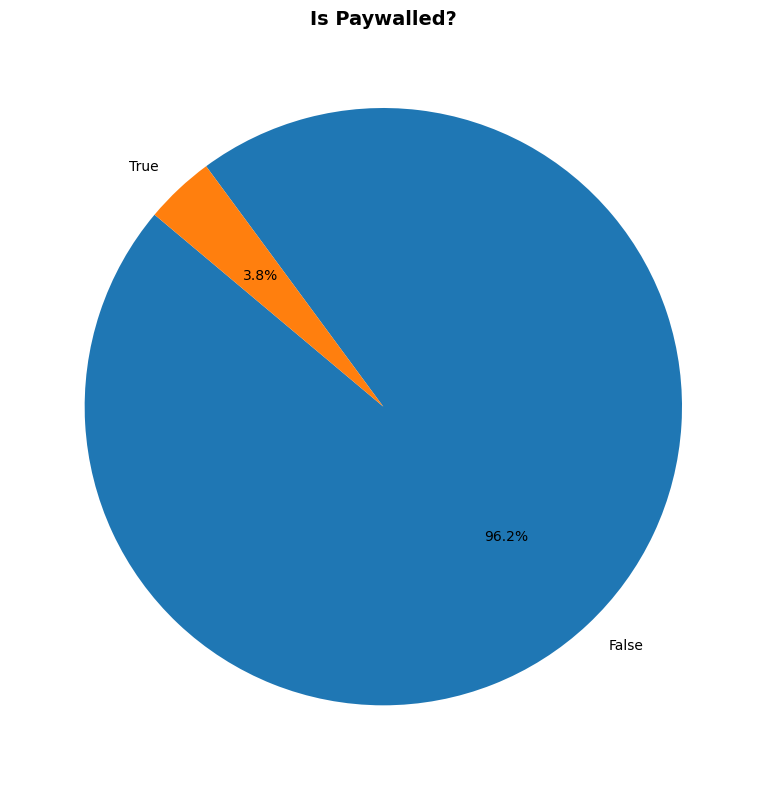

In [31]:
# Function to plot pie charts
def plot_pie_chart_2(df, columns, n, title, cmap_name='tab20'):
    for column in columns:
        all_values = df[column]
        
        # Count occurrences of each value
        values_count = all_values.value_counts()

        # Get the colormap
        cmap = plt.get_cmap(cmap_name)
        colors = cmap(range(len(values_count)))
        
        # Plotting as a pie chart
        plt.figure(figsize=(10, 8))
        values_count.plot.pie(autopct='%1.1f%%', startangle=140, labels=values_count.index, colors=colors)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.ylabel('')  # Hide the y-label
        
        plt.tight_layout()
        plt.show()
        
plot_pie_chart_2(df, df[['IsPaywalled']], 2, 'Is Paywalled?', cmap_name='tab10')

#### Value counts of feature 'IsInternationalCollaboration'

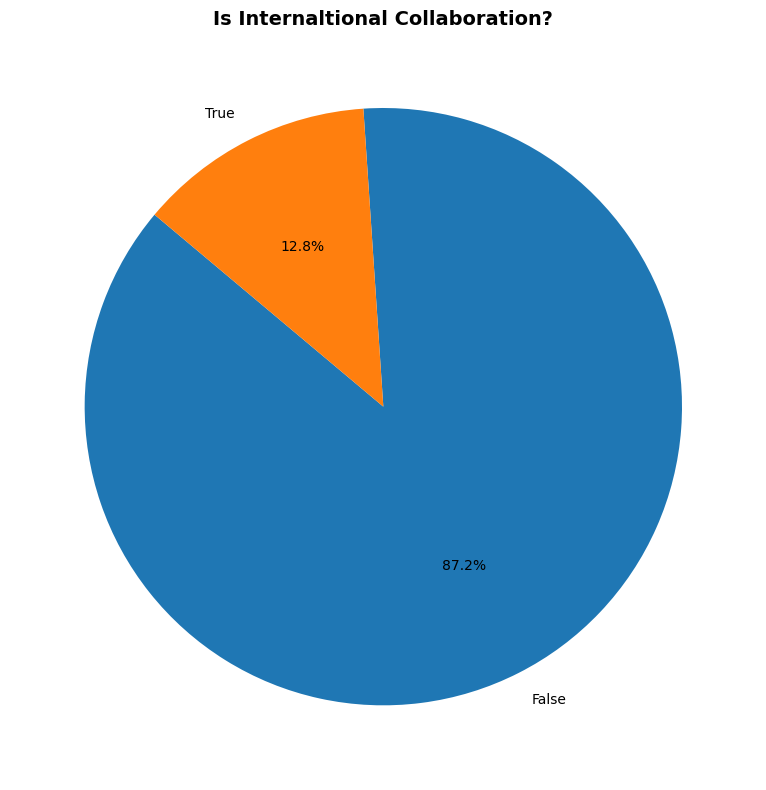

In [32]:
plot_pie_chart_2(df, df[['IsInternationalCollaboration']], 2, 'Is Internaltional Collaboration?', cmap_name='tab10')

#### Value counts of feature 'Reason'

Top 20 Counts for Reason:
Investigation by Journal/Publisher                11073
Notice - Limited or No Information                 7319
Unreliable Results                                 7171
Concerns/Issues About Data                         6516
Investigation by Third Party                       5602
Date of Retraction/Other Unknown                   4960
Concerns/Issues about Referencing/Attributions     4631
Breach of Policy by Author                         4623
Fake Peer Review                                   4210
Concerns/Issues with Peer Review                   3939
Duplication of Image                               3438
Concerns/Issues About Results                      2477
Paper Mill                                         2442
Investigation by Company/Institution               2365
Randomly Generated Content                         2084
Duplication of Article                             2032
Plagiarism of Article                              1807
Withdrawal            

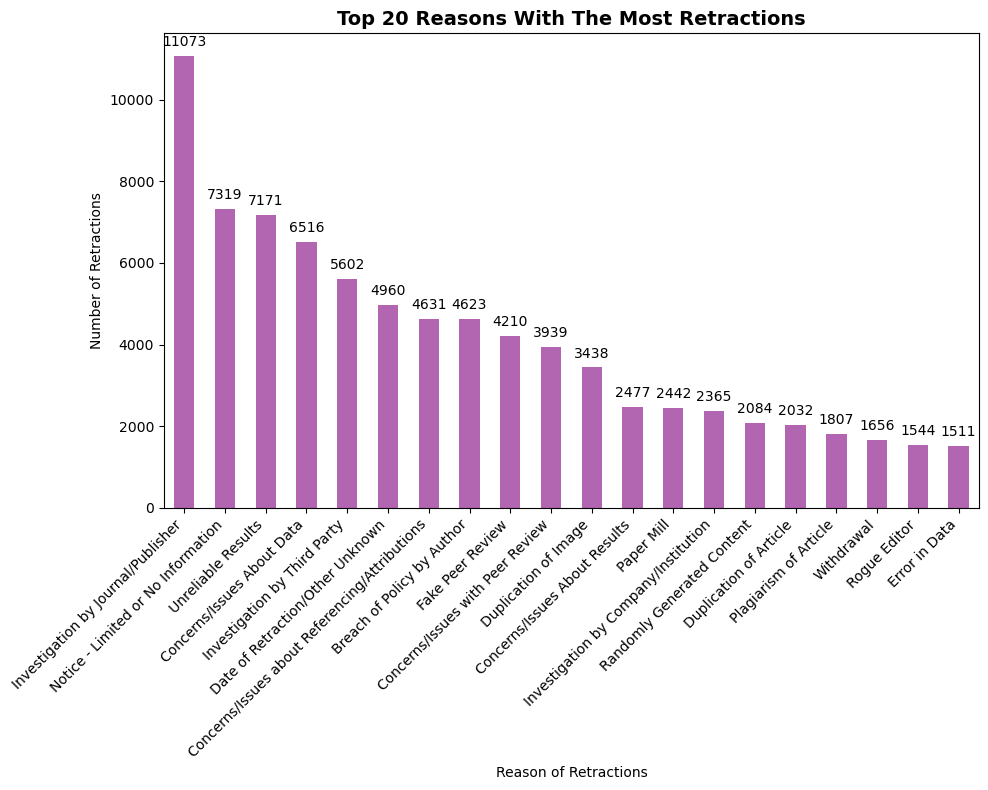

In [33]:
# Call the function to plot only the top 20 counts
plot_top_n_value_counts(df, df[['Reason']], 20, "Top 20 Reasons With The Most Retractions", "Reason of Retractions", 'purple')

#### Value counts of feature 'Reason_group'

##### Group_method: Scientific and academic misconduct

Group 1: Scientific error and academic misconduct

Group 2: No scientific error and no academic misconduct

Group 3: No scientific error and academic misconduct

Group 4: Scientific error and no academic misconduct

Top 4 Counts for Reason_group:
No scientific error and no academic misconduct    26578
Scientific error and no academic misconduct       12745
Academic misconduct and no scientific error       10796
Scientific error and academic misconduct           7288
Name: Reason_group, dtype: int64




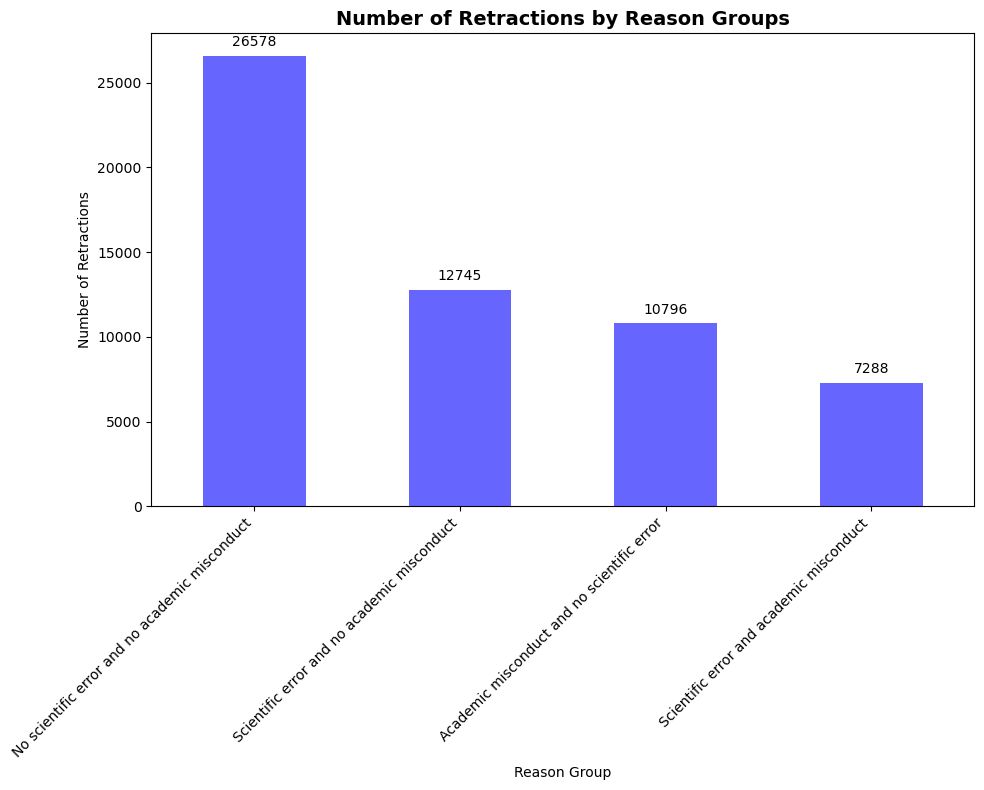

In [34]:
# Call the function
plot_top_n_value_counts(df, df[['Reason_group']], 4, "Number of Retractions by Reason Groups", "Reason Group")

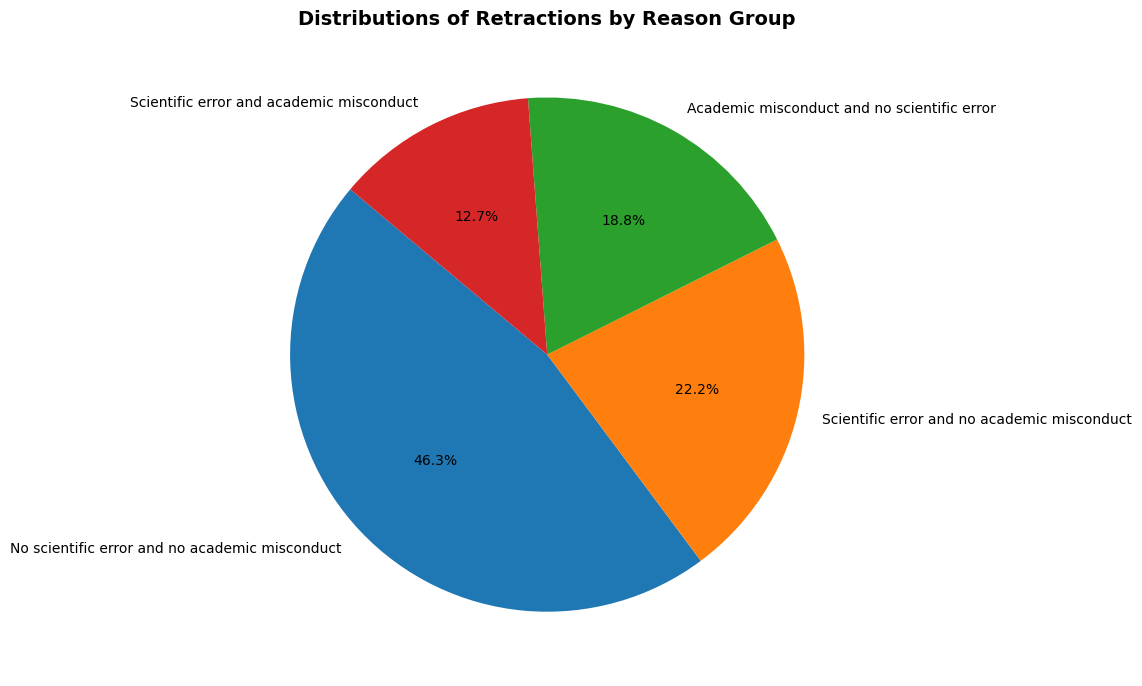

In [35]:
plot_pie_chart(df, df[['Reason_group']], 4, 'Distributions of Retractions by Reason Group', 'tab10')

#### Value counts of feature 'LevelOfSeriouness'

Top 4 Counts for LevelOfSeriousness:
The least serious    11560
The most serious      9493
Less serious          8586
Serious               5576
Name: LevelOfSeriousness, dtype: int64




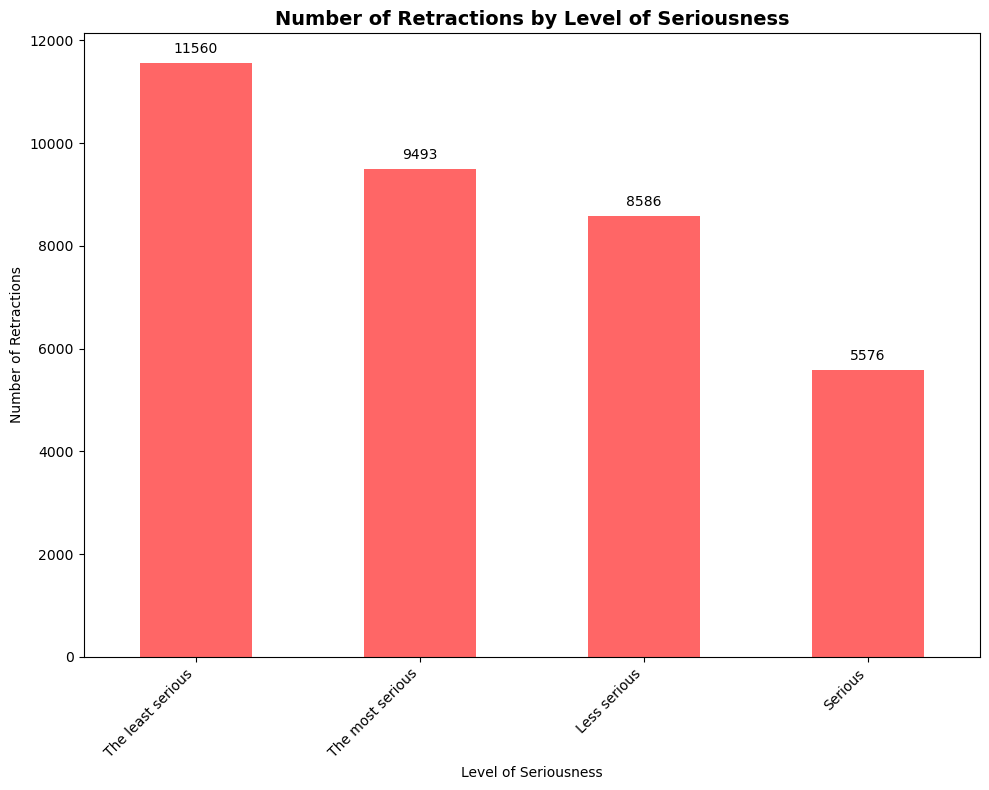

In [36]:
# Call the function
plot_top_n_value_counts(df, df[['LevelOfSeriousness']], 4, "Number of Retractions by Level of Seriousness", "Level of Seriousness", 'red')

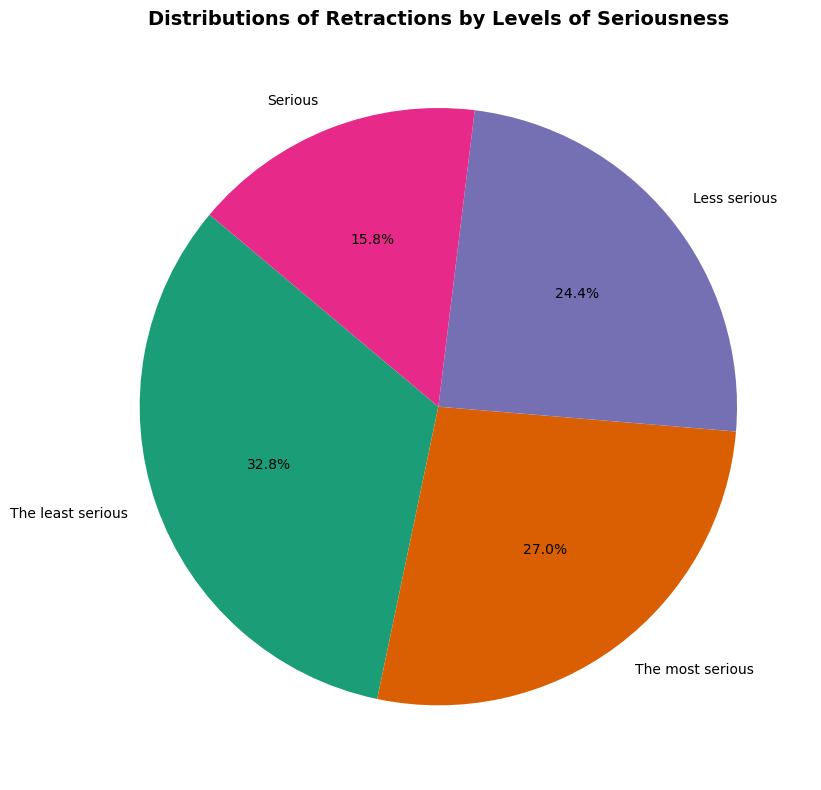

In [37]:
plot_pie_chart(df, df[['LevelOfSeriousness']], 4, 'Distributions of Retractions by Levels of Seriousness', 'Dark2')

### Multivariate analysis

#### Trends Over Time

In [38]:
# Function to plot a line graph showing top values of a feature over time
def plot_top_values_over_time(df, column, n, start_year, title, legend):
    # Ensure 'RetractionYear' is extracted
    df['RetractionYear'] = df['RetractionDate'].dt.year

    # Split and explode the specified column to handle multiple values per row
    df_exploded = df.assign(SplitColumn=df[column].str.split(';')).explode('SplitColumn')

    # Drop rows where the column is empty or null
    df_exploded = df_exploded[df_exploded['SplitColumn'].notna() & (df_exploded['SplitColumn'] != '')]

    # Count occurrences of each value per year
    values_over_time = df_exploded.groupby(['RetractionYear', 'SplitColumn']).size().reset_index(name='Count')

    # Find top n values overall based on total counts
    top_values = df_exploded['SplitColumn'].value_counts().head(n).index

    # Filter values_over_time for only top values
    values_over_time_top_n = values_over_time[values_over_time['SplitColumn'].isin(top_values)]

    # Pivot for visualization
    pivot_df = values_over_time_top_n.pivot(index='RetractionYear', columns='SplitColumn', values='Count').fillna(0)

    # Plot
    plt.figure(figsize=(12, 8))
    for value in top_values:
        if value in pivot_df.columns:  # Ensure value exists in columns
            plt.plot(pivot_df.index, pivot_df[value], marker='o', label=value)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Retrations', fontsize=12)
    plt.legend(title=legend)
    plt.xticks(pivot_df.index, labels=[int(year) for year in pivot_df.index], rotation=0)  # Set x-ticks as integers
    plt.xlim(start_year, pivot_df.index.max())
    plt.tight_layout()
    plt.show()

##### Trend of Reasons Over Time

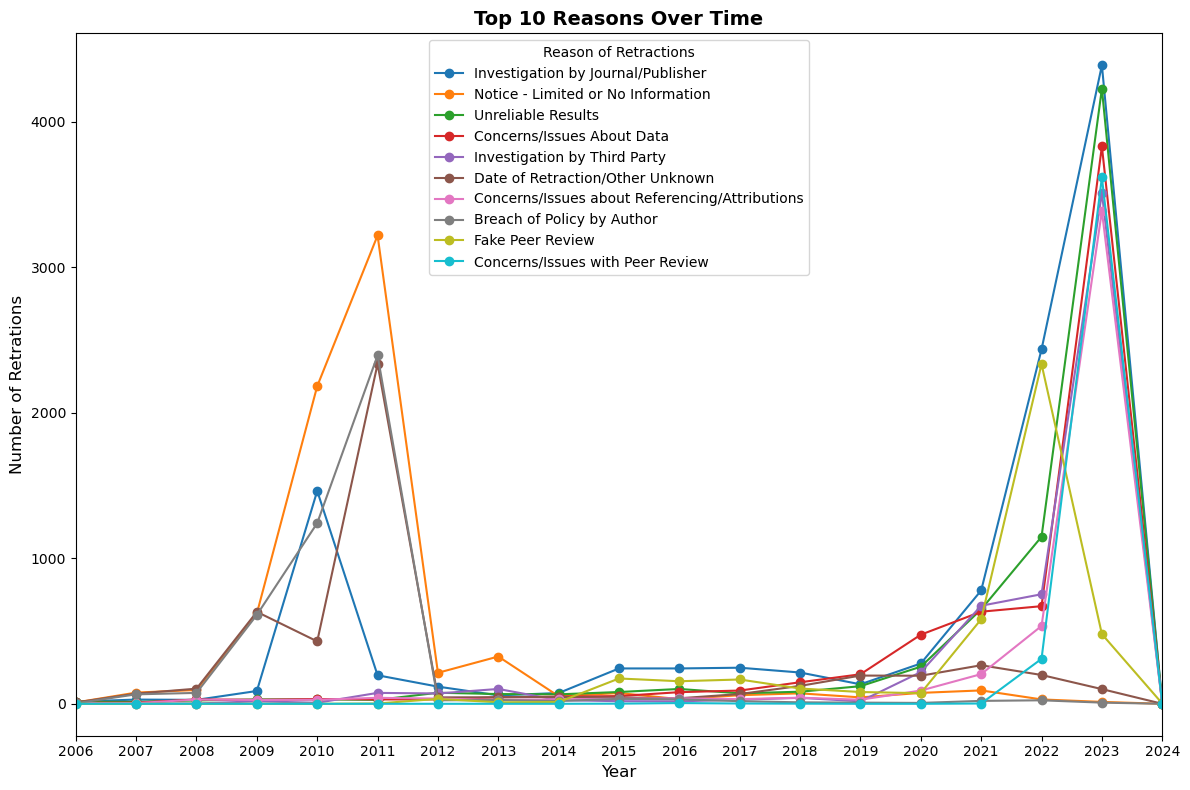

In [39]:
plot_top_values_over_time(df, 'Reason', 10, 2006, 'Top 10 Reasons Over Time', "Reason of Retractions")

In the past (2008-2012):
In recent years (2020-2024):

##### Trend of Subjects Over Time

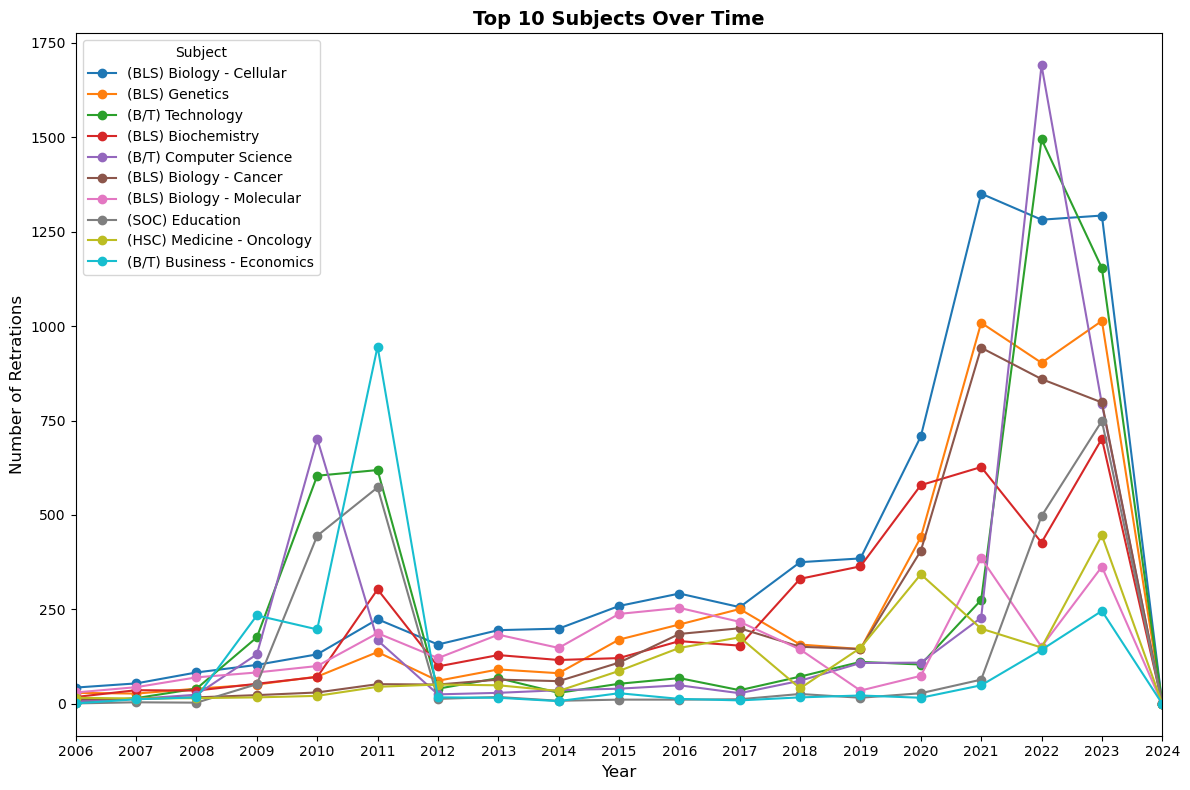

In [40]:
plot_top_values_over_time(df, 'Subject', 10, 2006, 'Top 10 Subjects Over Time', "Subject")

##### Trend of Countries Over Time

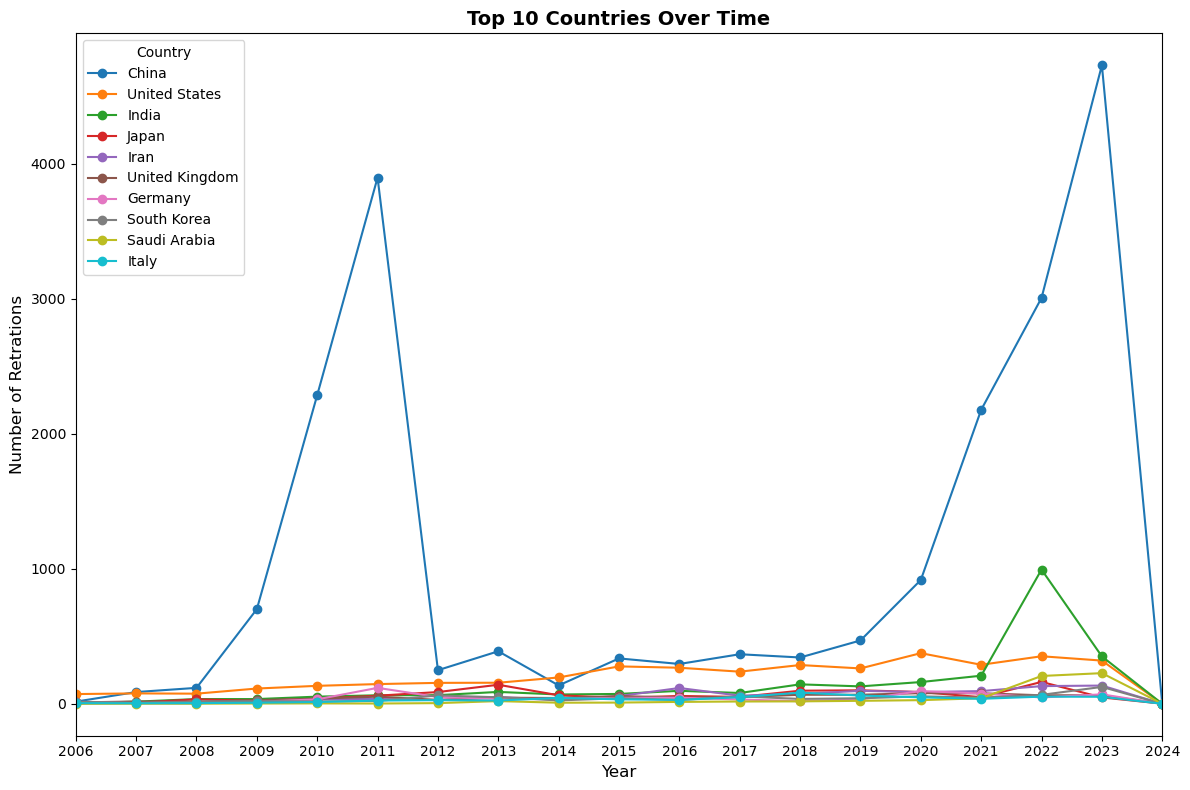

In [41]:
plot_top_values_over_time(df, 'Country', 10, 2006, 'Top 10 Countries Over Time', "Country")

##### Trend of Authors Over Time

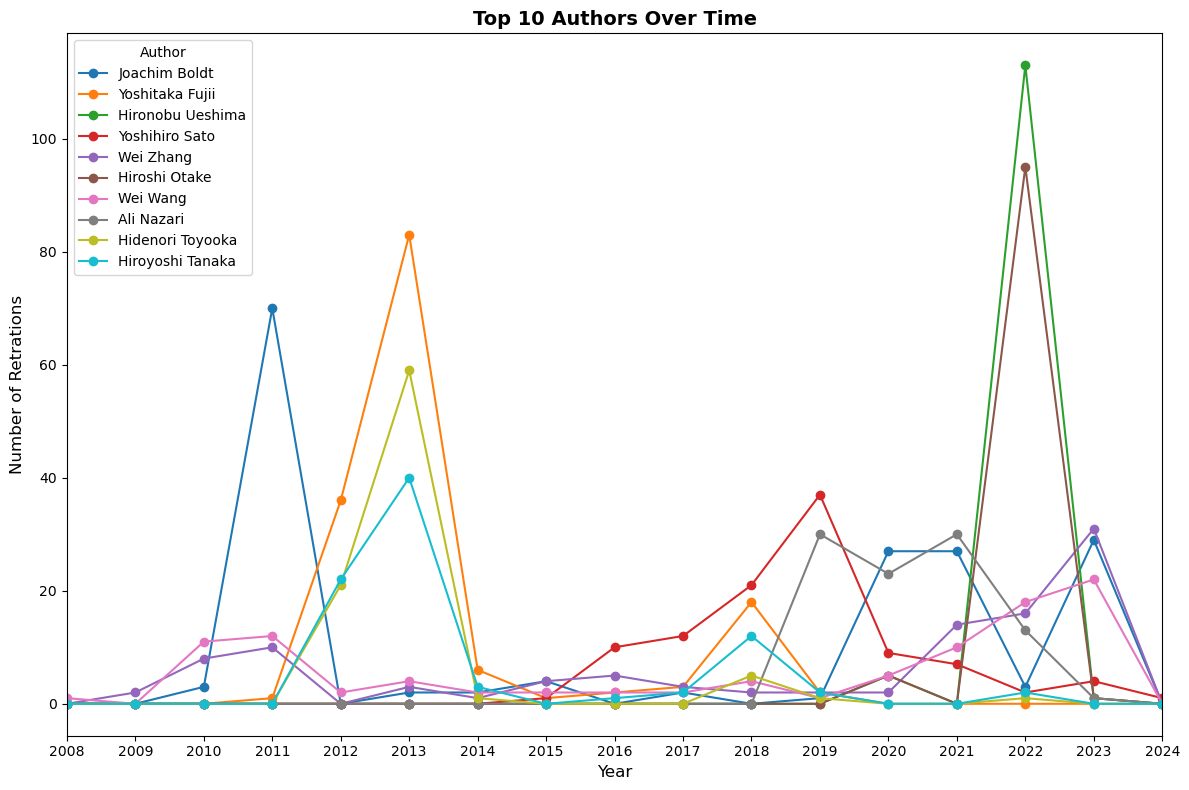

In [42]:
plot_top_values_over_time(df, 'Author', 10, 2008, 'Top 10 Authors Over Time', "Author")

##### Trend of Article Types Over Time

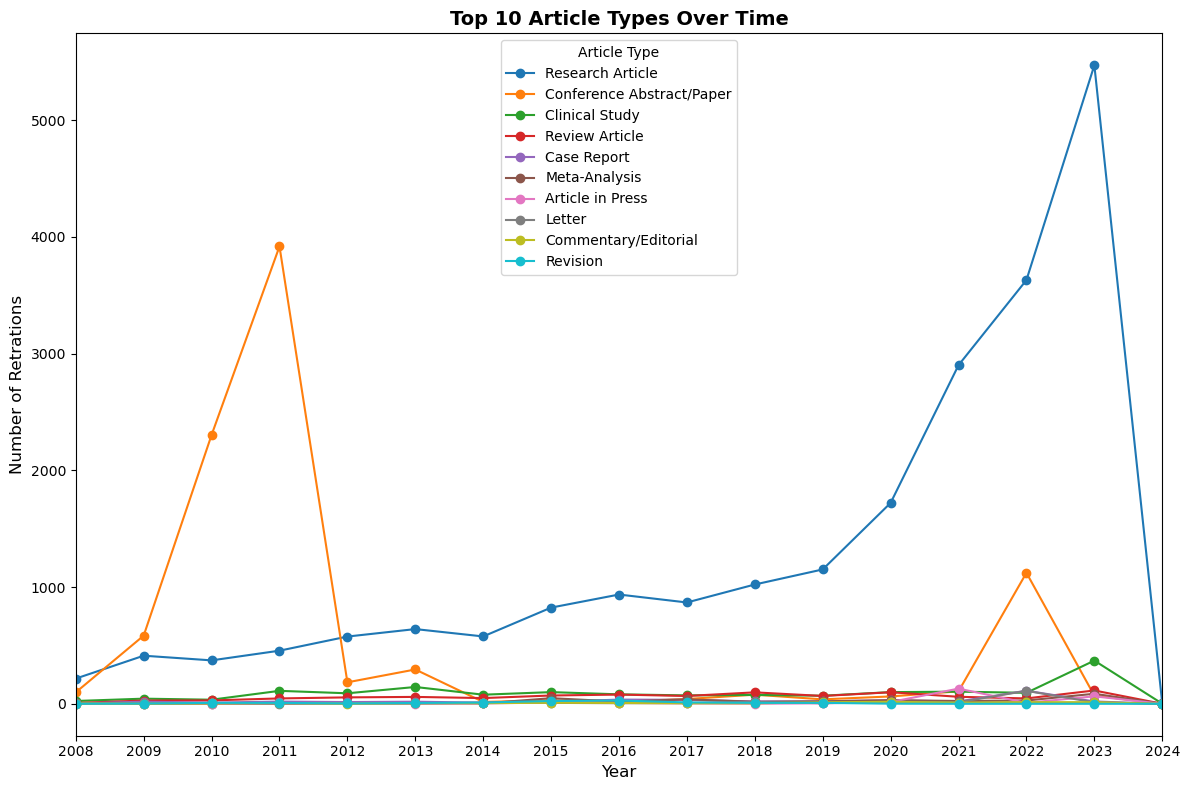

In [43]:
plot_top_values_over_time(df, 'ArticleType', 10, 2008, 'Top 10 Article Types Over Time', "Article Type")

##### Trend of Reason Group Over Time

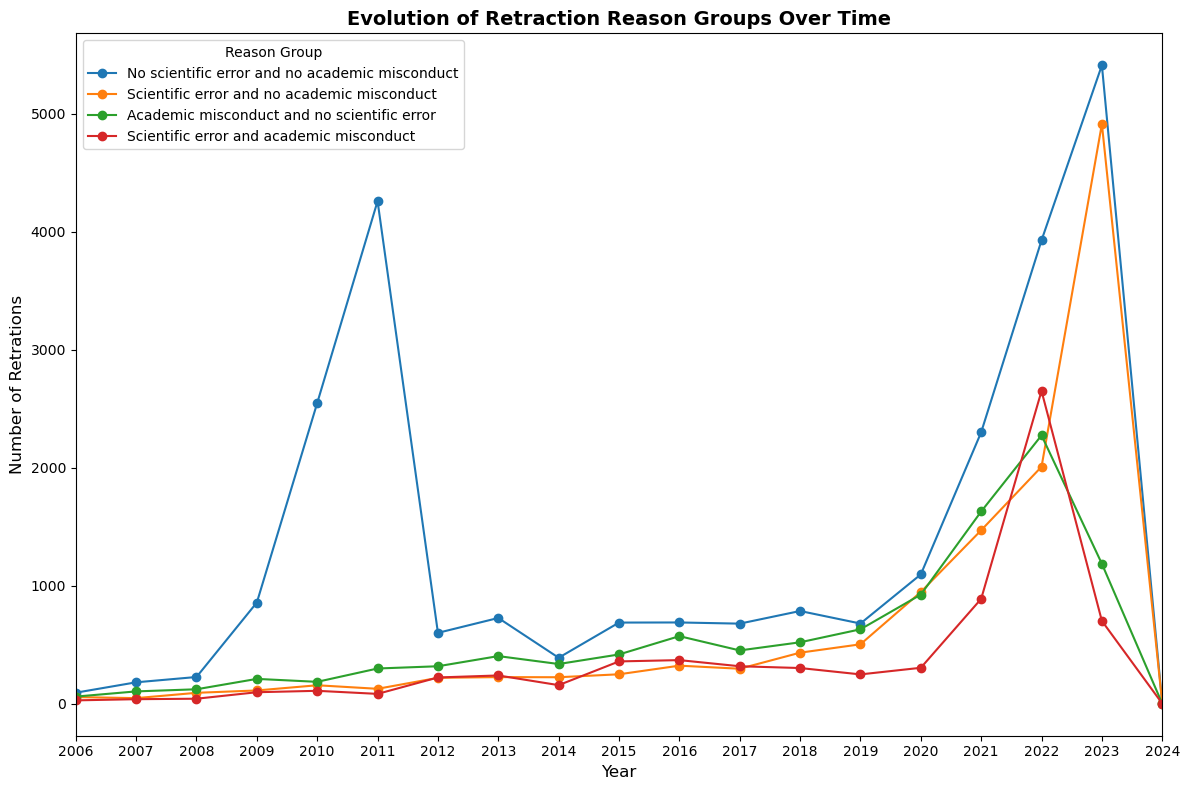

In [44]:
plot_top_values_over_time(df, 'Reason_group', 4, 2006, 'Evolution of Retraction Reason Groups Over Time', "Reason Group")

##### Trend of Level of Seriousness Over Time

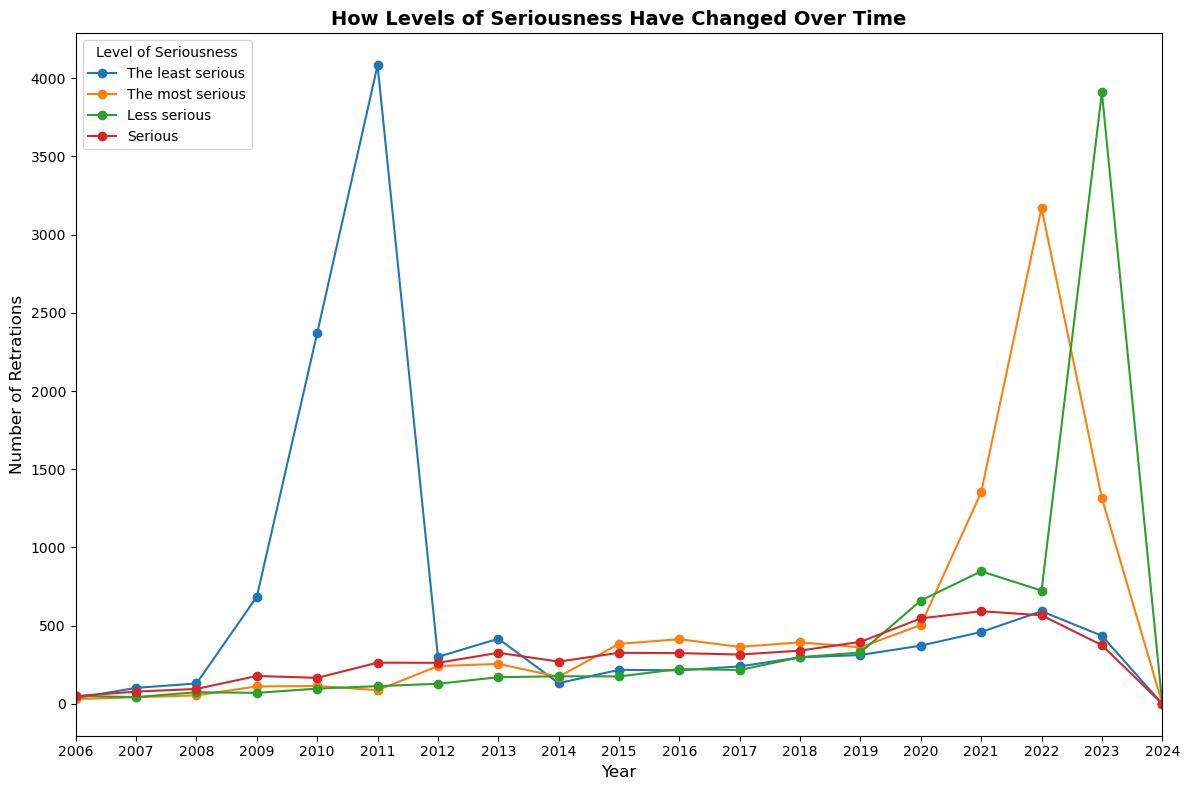

In [45]:
plot_top_values_over_time(df, 'LevelOfSeriousness', 4, 2006, 'How Levels of Seriousness Have Changed Over Time', "Level of Seriousness")

Interpretation:

#### Correlation Analysis

#####  Pearson Correlation for numerical features

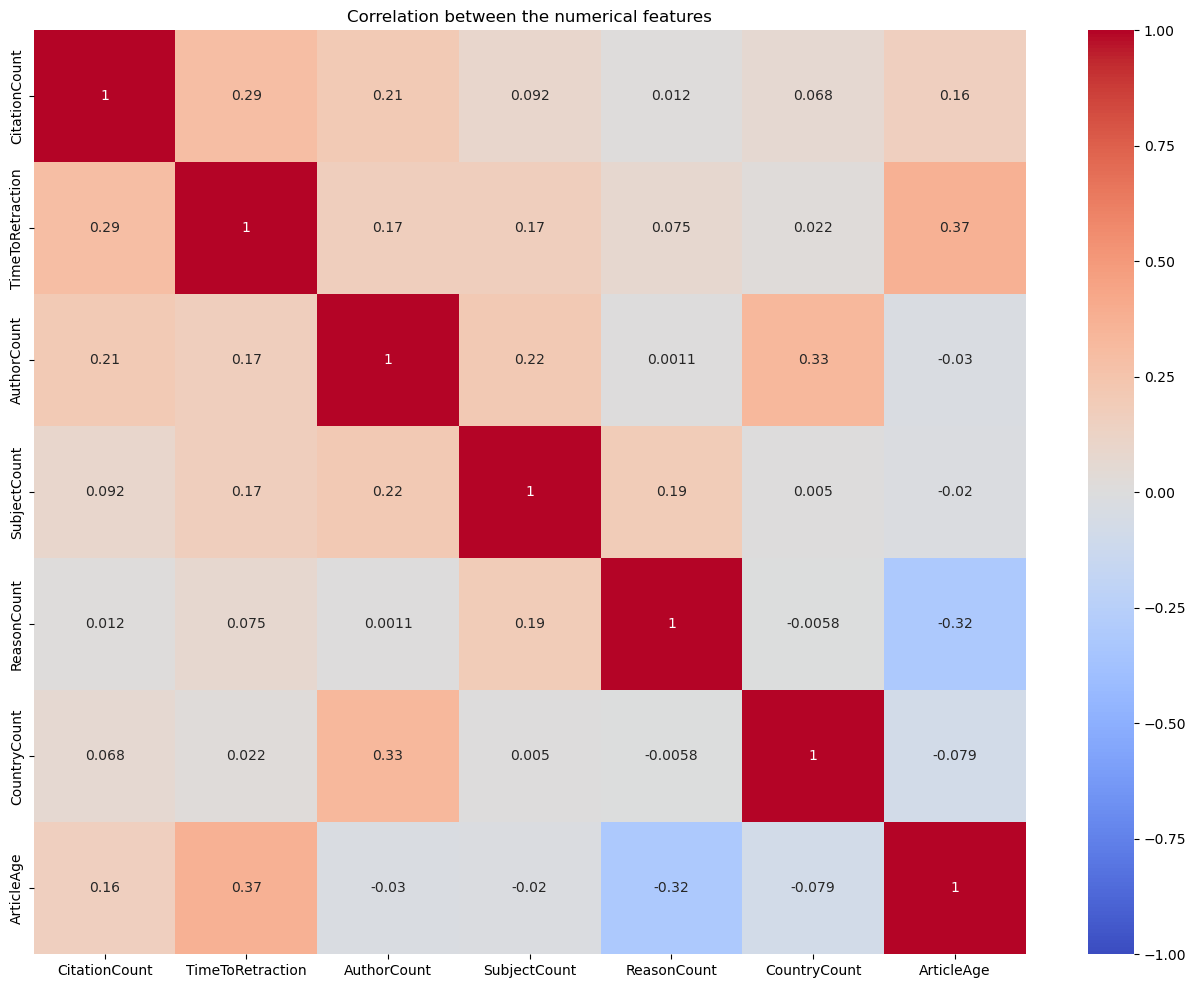

In [46]:
numerical_features = ['CitationCount', 'TimeToRetraction', 'AuthorCount', 'SubjectCount', 'ReasonCount', 'CountryCount', 'ArticleAge']
# numerical_features = ['TimeToRetraction', 'AuthorCount']
def correlation_heatmap():
    # Compute the correlation matrix just for the features
    feature_correlation = df[numerical_features].corr()

    # Plot heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(feature_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    # sns.heatmap(feature_correlation, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation between the numerical features")
    plt.show()

correlation_heatmap()

There is no pair of features that are highly correlated.

##### Spearman's Rank Correlation for numerical features with the target variable

In [47]:
# Dictionary to store Spearman correlation coefficients and p-values
spearman_results = {}

# Convert 'LevelOfSeriousness' to a numerical code for correlation analysis
df['LevelOfSeriousnessCode'] = df['LevelOfSeriousness'].astype("category").cat.codes

# Calculate Spearman's rank correlation for each numerical feature
for feature in numerical_features:
    coef, p = spearmanr(df[feature], df['LevelOfSeriousnessCode'])
    spearman_results[feature] = {'Spearman Coefficient': coef, 'p-value': p}

spearman_results

{'CitationCount': {'Spearman Coefficient': 0.011966935416133405,
  'p-value': 0.02472482516244504},
 'TimeToRetraction': {'Spearman Coefficient': 0.03787181478169294,
  'p-value': 1.1672259870747825e-12},
 'AuthorCount': {'Spearman Coefficient': -0.035482305616906025,
  'p-value': 2.7317693101963386e-11},
 'SubjectCount': {'Spearman Coefficient': -0.0343851635524355,
  'p-value': 1.087329361520573e-10},
 'ReasonCount': {'Spearman Coefficient': -0.032027743024988016,
  'p-value': 1.8376218224507866e-09},
 'CountryCount': {'Spearman Coefficient': -0.020082370879604714,
  'p-value': 0.00016401077569947766},
 'ArticleAge': {'Spearman Coefficient': 0.14008901701642726,
  'p-value': 8.498750034689226e-154}}

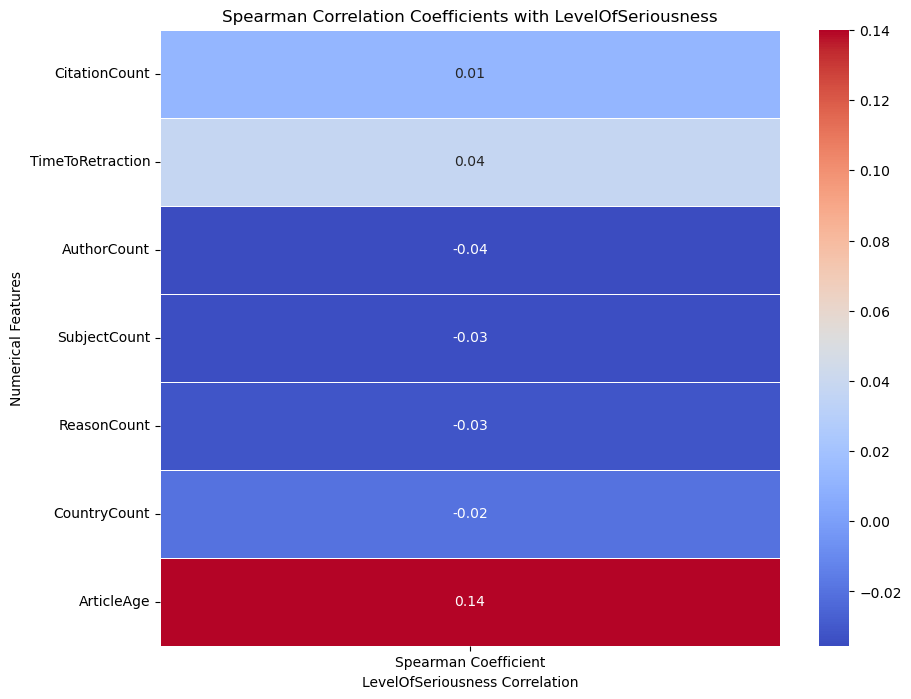

In [48]:
# Convert the results dictionary to a DataFrame for easier plotting
spearman_df = pd.DataFrame(spearman_results).T

# Creating a figure to display the heatmap
plt.figure(figsize=(10, 8))

# Using a heatmap to visualize the Spearman correlation coefficients
# The index of spearman_df corresponds to the features
# We'll use the 'Spearman Coefficient' column for the heatmap values
sns.heatmap(spearman_df[['Spearman Coefficient']], annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=.5)

# Adding visual and label enhancements
plt.title('Spearman Correlation Coefficients with LevelOfSeriousness')
plt.xlabel('LevelOfSeriousness Correlation')
plt.ylabel('Numerical Features')

plt.show()

##### Chi-Square Test of Independence for categorical features and the target variable

In [49]:
categorical_features = ['Subject', 'Institution', 'Publisher', 'Journal', 'Author', 'Country', 'Reason', 'ArticleType', 'Reason_group', 'IsPaywalled', 'IsInternationalCollaboration']

# Iterate through each nominal feature to perform Chi-Square Test
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['LevelOfSeriousness'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[feature] = {'Chi2': chi2, 'p-value': p, 'DoF': dof}

chi2_results

{'Subject': {'Chi2': 44808.94472492401, 'p-value': 0.0, 'DoF': 27777},
 'Institution': {'Chi2': 104313.1084497291,
  'p-value': 9.643882725530611e-28,
  'DoF': 99396},
 'Publisher': {'Chi2': 34796.02780139746, 'p-value': 0.0, 'DoF': 1722},
 'Journal': {'Chi2': 64865.92966631435, 'p-value': 0.0, 'DoF': 16587},
 'Author': {'Chi2': 103824.06331134672,
  'p-value': 5.211186795697345e-14,
  'DoF': 100455},
 'Country': {'Chi2': 12076.070703097124, 'p-value': 0.0, 'DoF': 4857},
 'Reason': {'Chi2': 105645.0, 'p-value': 0.0, 'DoF': 19365},
 'ArticleType': {'Chi2': 16811.005177536856, 'p-value': 0.0, 'DoF': 201},
 'Reason_group': {'Chi2': 105645.00000000001, 'p-value': 0.0, 'DoF': 42},
 'IsPaywalled': {'Chi2': 447.13880606820686,
  'p-value': 1.3588490645757027e-96,
  'DoF': 3},
 'IsInternationalCollaboration': {'Chi2': 382.21861279656343,
  'p-value': 1.5722101249552702e-82,
  'DoF': 3}}

Features with lower p-values (<0.05 typically) indicate a statistically significant association between the feature and the target variable.

On the other hand, features with higher p-values (>0.05) suggest that there is less evidence against the null hypothesis of independence, implying that the categorical feature and the target variable might not be related.

## Predictive Modeling

In order to optimise performance of some machine learning models, we encoded the categorical data to numerical data, then saved it toa new CSV file.

In [50]:
# Now load the encoded dataset.
df1 = pd.read_csv('encoded_retractions35215_V10.csv')
df1.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author,Cluster
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010,1
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009,1
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008,1
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009,1
4,964,56,2,1.0,0.764000,48.000000,351,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009,4


### Before data balancing

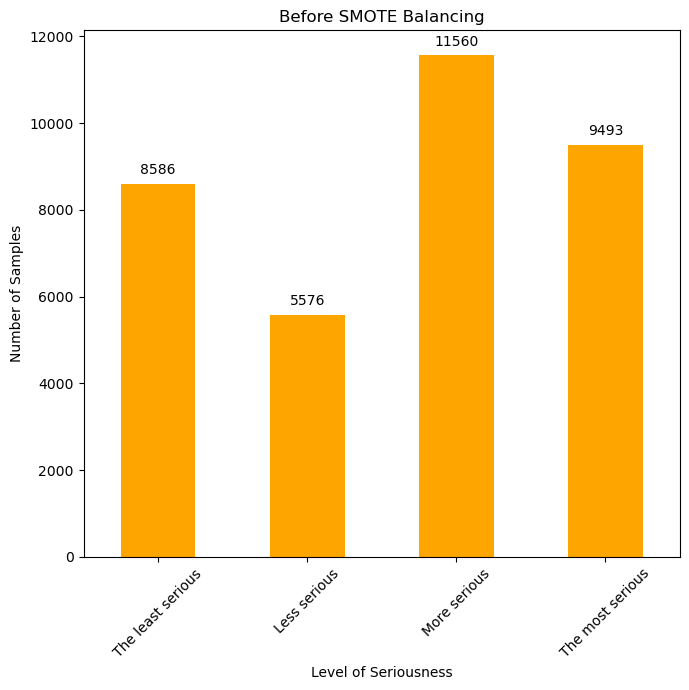

In [51]:
# Check the balance of 4 subsets in the dataset.
label_counts = df1['LevelOfSeriousness'].value_counts().sort_index()  # Ensure the labels are sorted

plt.figure(figsize=(7, 7))
ax = label_counts.plot(kind='bar', color='orange')  # 'ax' captures the plot axes
plt.title('Before SMOTE Balancing')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### After SMOTE balancing

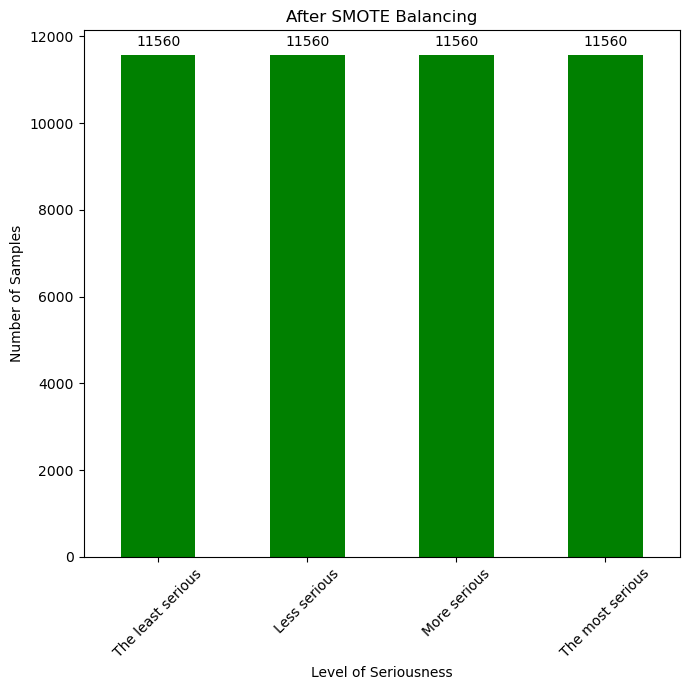

In [52]:
# Separate feataures and the target variable
X = df1.drop('LevelOfSeriousness', axis=1)
y = df1['LevelOfSeriousness']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df = pd.DataFrame(y_resampled, columns=['LevelOfSeriousness'])
label_counts_resampled = y_resampled_df['LevelOfSeriousness'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('After SMOTE Balancing')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### After undersampling

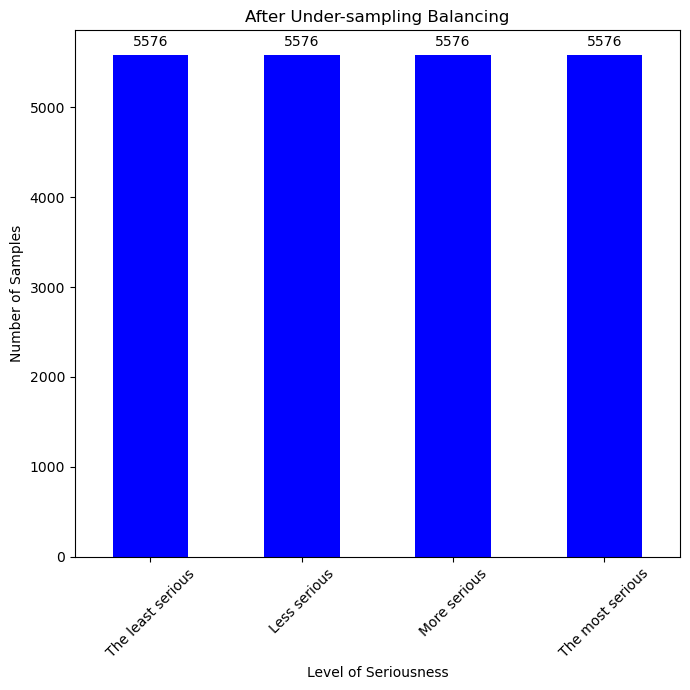

In [53]:
# Separate feataures and the target variable
X = df1.drop('LevelOfSeriousness', axis=1)
y = df1['LevelOfSeriousness']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Apply under-sampling
X_resampled_under, y_resampled_under = rus.fit_resample(X, y)

# Convert the resampled target variable back to a DataFrame
y_resampled_under_df = pd.DataFrame(y_resampled_under, columns=['LevelOfSeriousness'])

# Count the occurrences of each class in the balanced dataset
label_counts_resampled_under = y_resampled_under_df['LevelOfSeriousness'].value_counts().sort_index()

# Plot the distribution of classes after under-sampling
plt.figure(figsize=(7, 7))
ax_under = label_counts_resampled_under.plot(kind='bar', color='blue')
plt.title('After Under-sampling Balancing')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(label_counts_resampled_under.size), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value for clarity
for p in ax_under.patches:
    ax_under.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Naive Bayes

#### After SMOTE balancing

In [54]:
# Function to run Gaussian Naive Bayes Model
def GNB(X, y):
    # Identify numerical columns for standardization
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X_numerical = X[numerical_cols]
    
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=0)
    
    # Standardizing the numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the Gaussian Naive Bayes model
    gnb = GaussianNB()
    
    # Applying 5-fold cross-validation
    cv_results = cross_validate(gnb, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    
    # Training the model on the full training data
    gnb.fit(X_train_scaled, y_train)
    
    # Predicting on the test set
    y_pred = gnb.predict(X_test_scaled)
    
    # Evaluation metrics
    accuracy_NB = accuracy_score(y_test, y_pred)
    precision_NB = precision_score(y_test, y_pred, average='macro')
    recall_NB = recall_score(y_test, y_pred, average='macro')
    f1_NB = f1_score(y_test, y_pred, average='macro')
    
    print("Accuracy:", accuracy_NB)
    print("Precision:", precision_NB)
    print("Recall:", recall_NB)
    print("F1-Score:", f1_NB)

    return accuracy_NB, precision_NB, recall_NB, f1_NB

In [55]:
# Call the GNB function
accuracy_NB1, precision_NB1, recall_NB1, f1_NB1 = GNB(X_resampled, y_resampled)

Accuracy: 0.4695069204152249
Precision: 0.5132880572600672
Recall: 0.47123446236096567
F1-Score: 0.4394900783118337


#### After Undersampling

In [56]:
# Call the GNB function
accuracy_NB2, precision_NB2, recall_NB2, f1_NB2 = GNB(X_resampled_under, y_resampled_under)

Accuracy: 0.49831876260928043
Precision: 0.5100046797853756
Recall: 0.49782394483970804
F1-Score: 0.48125061892543636


=> NB model after SMOTE balancing is better than NB model after undersampling

### Random forests

#### Weighted avaraging

In [57]:
# Separate the features and the target variable
X = df1.drop('LevelOfSeriousness', axis=1)
y = df1['LevelOfSeriousness']

# For Random Forest, preprocessing like standardization is not necessary, but let's keep the dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(random_state=0)

# Applying 5-fold cross-validation
cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                            scoring=('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'))

# Training the model on the full training data
rfc.fit(X_train, y_train)

# Predicting on the test set
y_pred = rfc.predict(X_test)

# Evaluation metrics
accuracy_RF1 = accuracy_score(y_test, y_pred)
precision_RF1 = precision_score(y_test, y_pred, average='weighted')
recall_RF1 = recall_score(y_test, y_pred, average='weighted')
f1_RF1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_RF1)
print("Precision:", precision_RF1)
print("Recall:", recall_RF1)
print("F1-Score:", f1_RF1)

Accuracy: 0.7485446542666477
Precision: 0.7569840232977512
Recall: 0.7485446542666477
F1-Score: 0.7508587372182521


#### After SMOTE balancing

In [58]:
# Function to run Random Forests model
def RF(X, y):
    # For Random Forest, preprocessing like standardization is not necessary, but let's keep the dataset split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Initialize the Random Forest classifier
    rfc = RandomForestClassifier(random_state=0)
    
    # Applying 5-fold cross-validation
    cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    
    # Training the model on the full training data
    rfc.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = rfc.predict(X_test)
    
    # Evaluation metrics
    accuracy_RF = accuracy_score(y_test, y_pred)
    precision_RF = precision_score(y_test, y_pred, average='macro')
    recall_RF = recall_score(y_test, y_pred, average='macro')
    f1_RF = f1_score(y_test, y_pred, average='macro')
    
    print("Accuracy:", accuracy_RF)
    print("Precision:", precision_RF)
    print("Recall:", recall_RF)
    print("F1-Score:", f1_RF)

    return accuracy_RF, precision_RF, recall_RF, f1_RF

In [59]:
# Call the function
accuracy_RF2, precision_RF2, recall_RF2, f1_RF2 = RF(X_resampled, y_resampled)

Accuracy: 0.7840614186851211
Precision: 0.7955785149752016
Recall: 0.7847880179301802
F1-Score: 0.786490118392096


#### After Undersampling

In [60]:
# Call the function
accuracy_RF3, precision_RF3, recall_RF3, f1_RF3 = RF(X_resampled_under, y_resampled_under)

Accuracy: 0.7303295225285811
Precision: 0.7532651785219743
Recall: 0.7300838995552121
F1-Score: 0.7350673162315479


=> Random Forests after SMOTE balancing is the best model compared to other Random Forests models.

### K-NN

#### After SMOTE balancing

In [61]:
# Function to run KNN model
def KNN(X, y):
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Standardizing the features because KNN is sensitive to the scale of the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the K-Nearest Neighbors classifier
    knn = KNeighborsClassifier()
    
    # Applying 5-fold cross-validation
    cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    
    # Training the model on the full training data
    knn.fit(X_train_scaled, y_train)
    
    # Predicting on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluation metrics
    accuracy_KNN = accuracy_score(y_test, y_pred)
    precision_KNN = precision_score(y_test, y_pred, average='macro')
    recall_KNN = recall_score(y_test, y_pred, average='macro')
    f1_KNN = f1_score(y_test, y_pred, average='macro')
    
    print("Accuracy:", accuracy_KNN)
    print("Precision:", precision_KNN)
    print("Recall:", recall_KNN)
    print("F1-Score:", f1_KNN)

    return accuracy_KNN, precision_KNN, recall_KNN, f1_KNN

In [62]:
# Call the function
accuracy_KNN1, precision_KNN1, recall_KNN1, f1_KNN1 = KNN(X_resampled, y_resampled)

Accuracy: 0.6966911764705882
Precision: 0.7064847104585138
Recall: 0.6968587466381287
F1-Score: 0.6996446883661566


#### After undersampling

In [63]:
# Call the function
accuracy_KNN2, precision_KNN2, recall_KNN2, f1_KNN2 = KNN(X_resampled_under, y_resampled_under)

Accuracy: 0.6381977135171486
Precision: 0.6543445328613031
Recall: 0.6384448429130894
F1-Score: 0.6427796854911997


### SVM

#### After SMOTE balancing

In [64]:
# Function to run Support Vector Machines model
def SVM(X,y):
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Standardizing the features because SVM is sensitive to the scale of the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the Support Vector Machine classifier
    svc = SVC(random_state=0)
    
    # Applying 5-fold cross-validation
    cv_results = cross_validate(svc, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    
    # Training the model on the full training data
    svc.fit(X_train_scaled, y_train)
    
    # Predicting on the test set
    y_pred = svc.predict(X_test_scaled)
    
    # Evaluation metrics
    accuracy_SVM = accuracy_score(y_test, y_pred)
    precision_SVM = precision_score(y_test, y_pred, average='macro')
    recall_SVM = recall_score(y_test, y_pred, average='macro')
    f1_SVM = f1_score(y_test, y_pred, average='macro')
    
    print("Accuracy:", accuracy_SVM)
    print("Precision:", precision_SVM)
    print("Recall:", recall_SVM)
    print("F1-Score:", f1_SVM)

    return accuracy_SVM, precision_SVM, recall_SVM, f1_SVM

In [65]:
# Call the function
accuracy_SVM1, precision_SVM1, recall_SVM1, f1_SVM1 = KNN(X_resampled, y_resampled)

Accuracy: 0.6966911764705882
Precision: 0.7064847104585138
Recall: 0.6968587466381287
F1-Score: 0.6996446883661566


#### After Undersampling

In [66]:
# Call the function
accuracy_SVM2, precision_SVM2, recall_SVM2, f1_SVM2 = KNN(X_resampled_under, y_resampled_under)

Accuracy: 0.6381977135171486
Precision: 0.6543445328613031
Recall: 0.6384448429130894
F1-Score: 0.6427796854911997


=> SVM model after SMOTE balancing is better than SVM model after undersampling

### GBM

#### Weighted avaraging

In [67]:
# Separate the features and the target variable
X = df1.drop('LevelOfSeriousness', axis=1)
y = df1['LevelOfSeriousness']

# For GBM, preprocessing like standardization is not strictly necessary, but let's keep the dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=0)

# Applying 5-fold cross-validation
cv_results_gbm = cross_validate(gbc, X_train, y_train, cv=5,
                            scoring=('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'))

# Training the model on the full training data
gbc.fit(X_train, y_train)

# Predicting on the test set
y_pred_gbm = gbc.predict(X_test)

# Evaluation metrics
accuracy_GBM1 = accuracy_score(y_test, y_pred_gbm)
precision_GBM1 = precision_score(y_test, y_pred_gbm, average='weighted')
recall_GBM1 = recall_score(y_test, y_pred_gbm, average='weighted')
f1_GBM1 = f1_score(y_test, y_pred_gbm, average='weighted')

print("GBM Accuracy:", accuracy_GBM1)
print("GBM Precision:", precision_GBM1)
print("GBM Recall:", recall_GBM1)
print("GBM F1-Score:", f1_GBM1)

GBM Accuracy: 0.7006957262530171
GBM Precision: 0.7098797606948595
GBM Recall: 0.7006957262530171
GBM F1-Score: 0.7001328710114899


#### After SMOTE balancing

In [68]:
# Function to run Gradient Boosting Machines model
def GBM(X,y):
    # For GBM, preprocessing like standardization is not strictly necessary, but let's keep the dataset split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Initialize the Gradient Boosting classifier
    gbc = GradientBoostingClassifier(random_state=0)
    
    # Applying 5-fold cross-validation
    cv_results_gbm = cross_validate(gbc, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
    
    # Training the model on the full training data
    gbc.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred_gbm = gbc.predict(X_test)
    
    # Evaluation metrics
    accuracy_GBM = accuracy_score(y_test, y_pred_gbm)
    precision_GBM = precision_score(y_test, y_pred_gbm, average='macro')
    recall_GBM = recall_score(y_test, y_pred_gbm, average='macro')
    f1_GBM = f1_score(y_test, y_pred_gbm, average='macro')
    
    print("GBM Accuracy:", accuracy_GBM)
    print("GBM Precision:", precision_GBM)
    print("GBM Recall:", recall_GBM)
    print("GBM F1-Score:", f1_GBM)

    return accuracy_GBM, precision_GBM, recall_GBM, f1_GBM

In [69]:
# Call the function
accuracy_GBM2, precision_GBM2, recall_GBM2, f1_GBM2 = GBM(X_resampled, y_resampled)

GBM Accuracy: 0.6995025951557093
GBM Precision: 0.7168063536080177
GBM Recall: 0.700863076274636
GBM F1-Score: 0.7027234626968687


#### After Undersampling

In [70]:
# Call the function
accuracy_GBM3, precision_GBM3, recall_GBM3, f1_GBM3 = GBM(X_resampled_under, y_resampled_under)

GBM Accuracy: 0.6861690203990137
GBM Precision: 0.7077577932547506
GBM Recall: 0.6862006795638749
GBM F1-Score: 0.6905503497511576


=> GBM model using weighted avaraging performs better than other GBM models.

#### Compare models to choose the best one

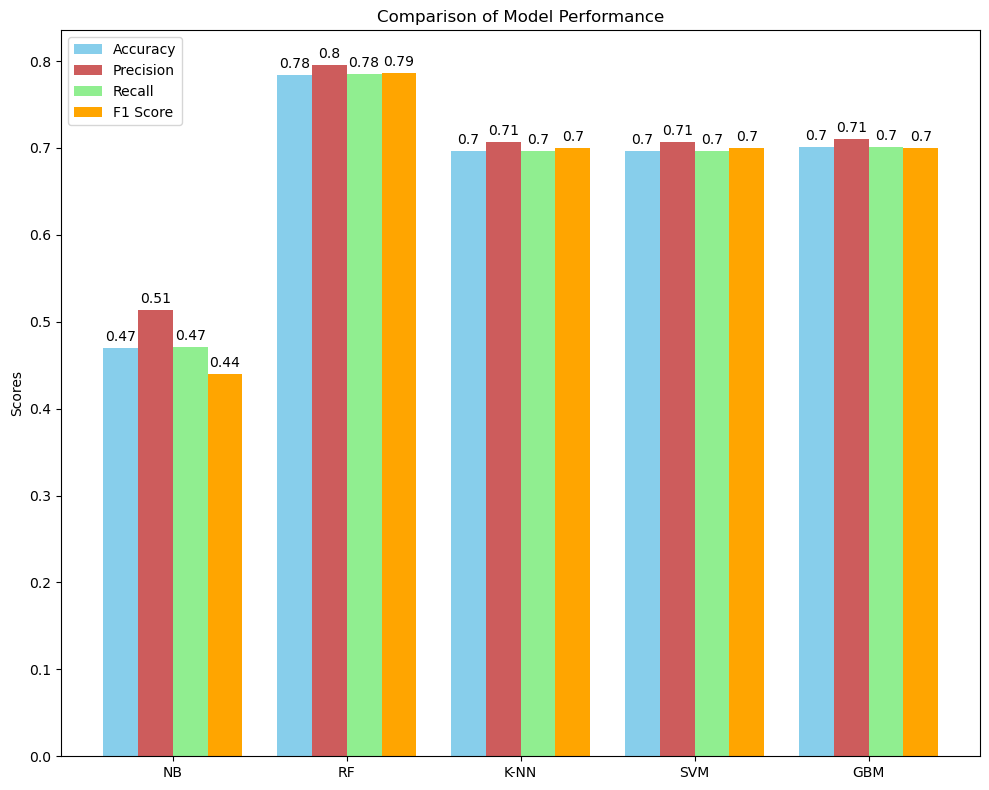

        NB = Naive Bayes; RF = Random Forest; K-NN = K-Nearest Neighbor; SVM = Support Vector Machine; GBM = Gradient Boosting Machine


In [71]:
# Labels for the groups
labels = ['NB', 'RF', 'K-NN', 'SVM', 'GBM']

# The data for each group
accuracy = [accuracy_NB1, accuracy_RF2, accuracy_KNN1, accuracy_SVM1, accuracy_GBM1]
precision = [precision_NB1, precision_RF2, precision_KNN1, precision_SVM1, precision_GBM1]
recall = [recall_NB1, recall_RF2, recall_KNN1, recall_SVM1, recall_GBM1]
f1_score = [f1_NB1, f1_RF2, f1_KNN1, f1_SVM1, f1_GBM1]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='SkyBlue')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='IndianRed')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='LightGreen')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='Orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
print('        NB = Naive Bayes; RF = Random Forest; K-NN = K-Nearest Neighbor; SVM = Support Vector Machine; GBM = Gradient Boosting Machine')

.

It can be seen from the bar chart above that Random Forests stands out as the optimal model with the highest performance.

#### Feature selection: Based on feature importance

Demonstrated in a separate coding file